#  AN  ANALYSIS OF NUMBER OF GP, RESPIRATORY TESTS MBS ITEMS CLAIMS ,  ADRENERGICS AND INHALERS PRESCRIPTIONS DISPENSED IN REGARD TO  POSSIBLE SHORT TERM HEALTH IMPACTS BY BUSHFIRE IN  AUSTRALIA  FOR THE YEARS 2017 - 2020

This project will analyse the data of number of all GP and respiratory test MBS item claimed by week in the Australian States New South Wales, Victoria and the Australian Capital Territory for the years 2017–18 to 2019–20. This project will also analyse the number of adrenergics and inhalants prescriptions dispensed from September 2019 to February 2020, in order to explore the short term effects of bushfire in the previous years.

# Introduction

Bushfires in Australia are a widespread and regular occurrence that have contributed significantly to shaping the nature of the continent over millions of years. Eastern Australia is one of the most fire-prone regions of the world(Wikipedia®,2021). But in recent previous years the bushfire season (mainly from September - February) is getting extreme. In particular the 2019–20 bushfire season unprecedented fires sweep across Australia with a massive impact on many communities, devastating the natural environment and compromising air quality(AIHW,2020).

The analysis completed as part of this project will help visualise the short term health impact of bushfire and to be more medically prepared every year for the bushfire season.

I have been living in Australia for the last six years. I have moved across states within Australia and now I am residing in Sydney, NSW since 2018. I personally experienced the bushfire season 2019-2020. The sky of the city was red for so many days and ash fell from the sky. Many animals were lost in the fire. The thick smog in the city was enough for a healthy person to get sick. So, when I was asked to look for a topic I thought of exploring the sideeffects of bushfire to human health.

I was able to extract some medical data focussed on bushfire seasons for the year 2017-2018, 2018-2019 and 2019-2020 (AIHW, 2020). This report shall be analysing the number of General Practitioner(GP) and respiratory test Medical Benifits Schedule(MBS) item claims by week in the states New South Wales(NSW), Victoria and the Australian Capital Territory(ACT) from 2017–18 to 2019–20.
This report will be analysing the weekly demand of medical facilities for the years 2017-2018, 2018-2019 and 2019-2020.



##### Questions to be answered:

The following questions will be answered:

1. Calculate and compare the proportion of the number of GP MBS items acquired in each given week of the years 2017-2018, 2018-2019 and 2019-2020  for  the state NSW, Victoria and ACT respectively.

2. Calculate and compare the proportion of the number of GP MBS items acquired in each given week of the years 2017-2018, 2018-2019 and 2019-2020  for  the state  Victoria and ACT respectively, also show the states wise proportion using subplots.

3. Show the comparison of the proportion of no. of respiratory MBS items claimed between the given states for the month September-February in years 2017-2018, 2018-2019, 2019-2020 respectively.


4. Calculate and compare the proportion of the number of respiratory MBS items claimed in each given week of the years 2017-2018, 2018-2019 and 2019-2020  for  the given states respectively.


4. Find the region in state Victoria in which the proportion of number of adrenergics and inhalers were  prescribed the most.

5. Calculate the proportion of number of adrenergics and inhalers prescribed in the given regions in NSW for the year 2019-2020.

6. Show the correlation between the number of repiratory MBS items claimed and number of adregenics and inhalers prescribed for the year 2019-2020 for the three states NSW, Canberra and ACT.


##### Data Files:

This notebook uses two data files. They are originally the sheets of the same excel file. The key that links the sheet is the Week column.

###### 'Table S3.csv'

###### 'Table S8.csv

These were originally excelsheets from the excel file 'Bushfire.xls'. Excel File was converted locally to csv file and then sheets were converted to excel file individually.

Steps are mentioned as follows:

In: wb = openpyxl.load_workbook('bushfire.xlsx')
    wb.sheetnames
    
Out:'Table of contents',
    '1.1 Methodology and notes',
    'Table S2',
    'Table S3',
    'Table S1',
    'Table S4',
    'Table S5',
    'Table S6',
    'Table S7',
    'Table S8',
    'Table S9',
    'Table S10',
    'Table S11',
    'Table S12',
    'Table S13',
    'Table S14']
    
In: for sheet in wb.sheetnames:
        df = pd.read_excel('bushfire.xlsx', sheet_name = sheet, header = [5], skipfooter = 12)
        df = df.dropna(axis=1, how='all')
        df.to_csv(f'{sheet}.csv')
        
        
This report focuses on two files mainly Table S3 and Table S8. 


Table S3 has data regarding the number and age-standardised rate of all GP and respiratory test Medical Benefit Schedule(MBS) item claims by week for the period 1Sept2017-1March2018, 1Sept2018-1March2019, 1Sept2019-29Feb2020 of the states New South Wales(NSW), Victoria and the Australian Capital Territory(ACT). 

Note that the last date of data in the files is 29Feb/1March covering the option of the year2020 being a leap year.

Table S8 contains data of the number and age standardised rate of PBS/RPBS adrenergics and inhalants(a) prescriptions dispensed 

Pharmaceutical Benefits Scheme and Repatriation Schedule of Pharmaceutical Benefits (PBS/RPBS) data in Table S8 is based on prescriptions that were filled. The data is based on patient's postcode not pharmacy postcode.
For more information on each data source, please see the Technical Supplemen

For more information on each data source, please go to <a href="https://www.aihw.gov.au/reports-data/behaviours-risk-factors/environment-and-health/data"  
target='-blank>Link to AIHW</a>

# Data Inspection and Cleaning

In [1]:
#Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%matplotlib inline
#import geopandas as gpd



  
    


In [2]:
#Import the required csv files
df_allgpitems = pd.read_csv('Table S3.csv',header = None, index_col = 0 )
inh_adr_df = pd.read_csv('Table S8.csv', skiprows = 1, header = [0], index_col = 0)

In [3]:
#Lets have a look at the gp and respiratory test items dataframe
df_allgpitems.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,,,,,,,,,,,,,,,,,,,
NaN,Unnamed: 0,All GP items(a),Unnamed: 2,Unnamed: 4,Unnamed: 5,Unnamed: 7,Unnamed: 8,Unnamed: 10,Unnamed: 11,Unnamed: 13,Unnamed: 14,Unnamed: 16,Unnamed: 17,Unnamed: 19,Unnamed: 20,Unnamed: 22,Unnamed: 23,Unnamed: 25,Unnamed: 26
0.0,NaN,New South Wales,NaN,NaN,NaN,NaN,NaN,Victoria,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,NaN,NaN,NaN,NaN,NaN
1.0,NaN,2017–18,NaN,2018–19,NaN,2019–20,NaN,2017–18,NaN,2018–19,NaN,2019–20,NaN,2017–18,NaN,2018–19,NaN,2019–20,NaN
2.0,Week,n,ASR,n,ASR,n,ASR,n,ASR,n,ASR,n,ASR,n,ASR,n,ASR,n,ASR
3.0,1–7 September,1039537.5000000001,12689.47,1023855.9199999998,12264.34,1048526.93,12399.82,809589.66,12442.29,802811.82,12028.06,836282.45,12291.28,40414.28,9829.28,40962.81,9724.49,42873.88,10045.4


In [4]:
#Replacing all Nan values with 0
df_allgpitems.fillna(0)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,,,,,,,,,,,,,,,,,,,
NaN,Unnamed: 0,All GP items(a),Unnamed: 2,Unnamed: 4,Unnamed: 5,Unnamed: 7,Unnamed: 8,Unnamed: 10,Unnamed: 11,Unnamed: 13,Unnamed: 14,Unnamed: 16,Unnamed: 17,Unnamed: 19,Unnamed: 20,Unnamed: 22,Unnamed: 23,Unnamed: 25,Unnamed: 26
0.0,0,New South Wales,0,0,0,0,0,Victoria,0,0,0,0,0,Australian Capital Territory,0,0,0,0,0
1.0,0,2017–18,0,2018–19,0,2019–20,0,2017–18,0,2018–19,0,2019–20,0,2017–18,0,2018–19,0,2019–20,0
2.0,Week,n,ASR,n,ASR,n,ASR,n,ASR,n,ASR,n,ASR,n,ASR,n,ASR,n,ASR
3.0,1–7 September,1039537.5000000001,12689.47,1023855.9199999998,12264.34,1048526.93,12399.82,809589.66,12442.29,802811.82,12028.06,836282.45,12291.28,40414.28,9829.28,40962.81,9724.49,42873.88,10045.4
4.0,8–14 September,1035971.6300000001,12626.83,1035107.0099999999,12399.56,1043208.46,12339.11,824083.73,12662.34,808444.6100000002,12105.67,832068.92,12219.01,42486.81,10330.64,40829.18,9689.88,42985.09,10067.72
5.0,15–21 September,1023707.68,12452.83,1026599.69,12283.63,1022490.49,12082.36,818533.4400000001,12568.22,788576.52,11777.47,822611.05,12047.21,40701.94,9881.57,40772.64,9667.01,42391.25,9917.7
6.0,22–28 September,979140.5199999999,11860.08,1003967.98,11976.24,1022408.5,12043.7,788671.0599999999,12030.43,671042.7700000001,9988.95,693675.23,10116.9,34294.4,8299.08,40334.94,9556.25,42046.99,9831.61
7.0,29 September–5 October,815758.4299999997,9861.25,832454.36,9905.39,982042.47,11535.93,666931.6099999999,10157.56,770592.4000000001,11458.89,790726.83,11521.54,31890.21,7705.91,32589.32,7696.27,40341.76,9404.84


In [5]:

#df_allgpitems.describe()

In [6]:
#Using Slicing separate dataframes are defined for weeks, gp items for states NSW, Victoria and ACT, respiratorytests for NSW, Victoria and ACT
df_allgpitems_weeks = df_allgpitems.iloc[2:30,0:1]
df_allgpitems_nsw = df_allgpitems.iloc[2:30,1:7]
df_allgpitems_victoria = df_allgpitems.iloc[2:30,7:13]
df_allgpitems_act = df_allgpitems.iloc[2:30,13:]
df_respitems_nsw = df_allgpitems.iloc[30:,1:7]
df_respitems_victoria = df_allgpitems.iloc[30:,7:13]
df_respitems_act = df_allgpitems.iloc[30:,13:]
df_respitems_weeks = df_allgpitems.iloc[30:,0:1]

#concat 'week' df with all the other df's 
df_allgpitems_act = pd.concat([df_allgpitems_weeks,df_allgpitems_act],axis = 1, ignore_index=True)
df_allgpitems_act = np.round(df_allgpitems_act, decimals=2)
df_allgpitems_nsw = pd.concat([df_allgpitems_weeks,df_allgpitems_nsw],axis = 1, ignore_index=True)
df_allgpitems_nsw = np.round(df_allgpitems_nsw, decimals=2)
df_allgpitems_victoria = pd.concat([df_allgpitems_weeks,df_allgpitems_victoria],axis = 1, ignore_index=True)
df_allgpitems_victoria = np.round(df_allgpitems_victoria, decimals=2)
df_respitems_nsw = pd.concat([df_respitems_weeks,df_respitems_nsw],axis = 1, ignore_index=True)
df_respitems_act = pd.concat([df_respitems_weeks,df_respitems_act],axis = 1, ignore_index=True)
df_respitems_victoria = pd.concat([df_respitems_weeks,df_respitems_victoria],axis = 1, ignore_index=True)

In [7]:
#Define a list having column names for all df's
columnsidx = ['Week','2017-2018:n','2017-2018:ASR','2018-2019:n','2018-2019:ASR','2019-2020:n','2019-2020:ASR']


In [8]:
#Assign the column names to the gp items df's, convert the 
df_allgpitems_nsw.columns = columnsidx
df_allgpitems_nsw.head()


,Week,2017-2018:n,2017-2018:ASR,2018-2019:n,2018-2019:ASR,2019-2020:n,2019-2020:ASR
0,,,,,,,
1.0,NaN,2017–18,NaN,2018–19,NaN,2019–20,NaN
2.0,Week,n,ASR,n,ASR,n,ASR
3.0,1–7 September,1039537.5000000001,12689.47,1023855.9199999998,12264.34,1048526.93,12399.82
4.0,8–14 September,1035971.6300000001,12626.83,1035107.0099999999,12399.56,1043208.46,12339.11
5.0,15–21 September,1023707.68,12452.83,1026599.69,12283.63,1022490.49,12082.36


 Constructing a dataframe containing gp items detail week wise for the state NSW

In [9]:
#Removing two rows of empty space after columnname , and checking the type of each column
df_allgpitems_nsw = df_allgpitems_nsw.drop([1,2])

In [10]:
#Rounding the two columns df_allgpitems_nsw['2017-2018:n'] and df_allgpitems_nsw['2018-2019:n'],converting their type to float
df_allgpitems_nsw['2017-2018:n'] = df_allgpitems_nsw['2017-2018:n'].astype(float)
df_allgpitems_nsw['2018-2019:n'] = df_allgpitems_nsw['2018-2019:n'].astype(float)
df_allgpitems_nsw['2019-2020:n'] = df_allgpitems_nsw['2019-2020:n'].astype(float)
np.round(df_allgpitems_nsw['2017-2018:n'], decimals=2)
np.round(df_allgpitems_nsw['2018-2019:n'], decimals=2)
#resetting the index and removing the extra column
df_allgpitems_nsw = df_allgpitems_nsw.reset_index()
del df_allgpitems_nsw[0]
df_allgpitems_nsw

#lets have a look at the columns of the df containing gp items detail week wise for the state NSW
df_allgpitems_nsw.columns


Index(['Week', '2017-2018:n', '2017-2018:ASR', '2018-2019:n', '2018-2019:ASR',
       '2019-2020:n', '2019-2020:ASR'],
      dtype='object')

Defining dataframe containing week wise gp items detail for the state Victoria

In [11]:
#Following the same steps to define a df containing gp items detail week wise for the state Victoria
df_allgpitems_victoria.columns = columnsidx
df_allgpitems_victoria = df_allgpitems_victoria.drop([1,2])
df_allgpitems_victoria['2017-2018:n'] = df_allgpitems_victoria['2017-2018:n'].astype(float)
df_allgpitems_victoria['2018-2019:n'] = df_allgpitems_victoria['2018-2019:n'].astype(float)
df_allgpitems_victoria['2019-2020:n'] = df_allgpitems_victoria['2019-2020:n'].astype(float)
np.round(df_allgpitems_victoria['2017-2018:n'], decimals=2)
np.round(df_allgpitems_victoria['2018-2019:n'], decimals=2)
df_allgpitems_victoria = df_allgpitems_victoria.reset_index()
del df_allgpitems_victoria[0]
df_allgpitems_victoria.head()
#print(df_allgpitems_victoria.columns)




,Week,2017-2018:n,2017-2018:ASR,2018-2019:n,2018-2019:ASR,2019-2020:n,2019-2020:ASR
0,1–7 September,809589.66,12442.29,802811.82,12028.06,836282.45,12291.28
1,8–14 September,824083.73,12662.34,808444.61,12105.67,832068.92,12219.01
2,15–21 September,818533.44,12568.22,788576.52,11777.47,822611.05,12047.21
3,22–28 September,788671.06,12030.43,671042.77,9988.95,693675.23,10116.9
4,29 September–5 October,666931.61,10157.56,770592.40,11458.89,790726.83,11521.54


Defining dataframe containing weekwise gp items detail for the state ACT

In [12]:
df_allgpitems_act.columns = columnsidx
df_allgpitems_act = df_allgpitems_act.drop([1,2])
df_allgpitems_act['2017-2018:n'] = df_allgpitems_act['2017-2018:n'].astype(float)
df_allgpitems_act['2018-2019:n'] = df_allgpitems_act['2018-2019:n'].astype(float)
df_allgpitems_act['2019-2020:n'] = df_allgpitems_act['2019-2020:n'].astype(float)
np.round(df_allgpitems_act['2017-2018:n'], decimals=2)
np.round(df_allgpitems_act['2018-2019:n'], decimals=2)
df_allgpitems_act = df_allgpitems_act.reset_index()
del df_allgpitems_act[0]
df_allgpitems_act.head()
#print(df_allgpitems_act.columns)



,Week,2017-2018:n,2017-2018:ASR,2018-2019:n,2018-2019:ASR,2019-2020:n,2019-2020:ASR
0,1–7 September,40414.28,9829.28,40962.81,9724.49,42873.88,10045.4
1,8–14 September,42486.81,10330.64,40829.18,9689.88,42985.09,10067.72
2,15–21 September,40701.94,9881.57,40772.64,9667.01,42391.25,9917.7
3,22–28 September,34294.40,8299.08,40334.94,9556.25,42046.99,9831.61
4,29 September–5 October,31890.21,7705.91,32589.32,7696.27,40341.76,9404.84


Defining dataframe containing weekwise respiratory test MBS items detail for the state NSW

In [13]:
df_respitems_nsw.columns = columnsidx
df_respitems_nsw = df_respitems_nsw.drop([29,30, 31, 32])
df_respitems_nsw['2017-2018:n'] = df_respitems_nsw['2017-2018:n'].astype(float)
df_respitems_nsw['2018-2019:n'] = df_respitems_nsw['2018-2019:n'].astype(float)
np.round(df_respitems_nsw['2017-2018:n'], decimals=2)
np.round(df_respitems_nsw['2018-2019:n'], decimals=2)
df_respitems_nsw = df_respitems_nsw.reset_index()
del df_respitems_nsw[0]
df_respitems_nsw.head()
#print(df_respitems_nsw.columns)


,Week,2017-2018:n,2017-2018:ASR,2018-2019:n,2018-2019:ASR,2019-2020:n,2019-2020:ASR
0,1–7 September,5197.36,60.16,5087.89,57.9,5162.36,57.65
1,8–14 September,4742.45,54.71,5127.77,58.13,4985.19,55.75
2,15–21 September,5049.09,58.45,4764.24,54.32,5078.2,56.79
3,22–28 September,5153.64,59.8,4976.07,56.49,4648.63,52.3
4,29 September–5 October,3962.71,46.09,3976.76,45.27,4308.46,48.36


In [14]:
df_respitems_nsw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Week           26 non-null     object 
 1   2017-2018:n    26 non-null     float64
 2   2017-2018:ASR  26 non-null     object 
 3   2018-2019:n    26 non-null     float64
 4   2018-2019:ASR  26 non-null     object 
 5   2019-2020:n    26 non-null     object 
 6   2019-2020:ASR  26 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1000.0+ bytes


In [15]:
df_respitems_nsw.describe()

,2017-2018:n,2018-2019:n
count,26.000000,26.000000
mean,4732.901538,4629.271154
std,1294.199238,1301.538923
min,649.900000,460.940000
25%,4615.625000,4423.042500
50%,5259.710000,5146.175000
75%,5405.287500,5308.377500
max,5666.910000,5657.020000


Defining dataframe containing week wise respiratory test MBS items detail for the state Victoria

In [16]:
df_respitems_victoria.columns = columnsidx
df_respitems_victoria = df_respitems_victoria.drop([29,30, 31, 32])
df_respitems_victoria['2017-2018:n'] = df_respitems_victoria['2017-2018:n'].astype(float)
df_respitems_victoria['2018-2019:n'] = df_respitems_victoria['2018-2019:n'].astype(float)
np.round(df_respitems_victoria['2017-2018:n'], decimals=2)
np.round(df_respitems_victoria['2018-2019:n'], decimals=2)
df_respitems_victoria = df_respitems_victoria.reset_index()
del df_respitems_victoria[0]
df_respitems_victoria.head()


,Week,2017-2018:n,2017-2018:ASR,2018-2019:n,2018-2019:ASR,2019-2020:n,2019-2020:ASR
0,1–7 September,2825.12,41.81,3025.09,43.51,3008.67,42.37
1,8–14 September,2785.78,41.11,2911.15,41.72,3175.44,44.69
2,15–21 September,2860.62,42.2,2779.89,40.12,2923.97,41.49
3,22–28 September,2858.20,42.66,2376.58,34.27,2372.67,33.51
4,29 September–5 October,2451.86,36.18,2901.68,41.95,2798.18,39.6


In [17]:
df_respitems_victoria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Week           26 non-null     object 
 1   2017-2018:n    26 non-null     float64
 2   2017-2018:ASR  26 non-null     object 
 3   2018-2019:n    26 non-null     float64
 4   2018-2019:ASR  26 non-null     object 
 5   2019-2020:n    26 non-null     object 
 6   2019-2020:ASR  26 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1000.0+ bytes


In [18]:
df_respitems_victoria.describe()

,2017-2018:n,2018-2019:n
count,26.000000,26.000000
mean,2857.755769,2812.583077
std,664.772176,731.703353
min,654.920000,314.790000
25%,2795.615000,2795.230000
50%,3084.575000,3017.985000
75%,3242.422500,3213.145000
max,3434.830000,3487.520000


Defining dataframe containing weekwise respiratory test MBS items detail for the state ACT

In [19]:
df_respitems_act.columns = columnsidx
df_respitems_act = df_respitems_act.drop([29,30, 31, 32])
df_respitems_act['2018-2019:n'] = df_respitems_act['2018-2019:n'].replace('n.p.', 0)
df_respitems_act['2017-2018:n'] = df_respitems_act['2017-2018:n'].astype(float)
df_respitems_act['2018-2019:n'] = df_respitems_act['2018-2019:n'].astype(float)
np.round(df_respitems_act['2017-2018:n'], decimals=2)
np.round(df_respitems_act['2018-2019:n'], decimals=2)
df_respitems_act = df_respitems_act.reset_index()
del df_respitems_act[0]
df_respitems_act.head()

,Week,2017-2018:n,2017-2018:ASR,2018-2019:n,2018-2019:ASR,2019-2020:n,2019-2020:ASR
0,1–7 September,120.23,29.9,111.33,26.33,138.72,32.49
1,8–14 September,122.43,29.91,154.67,36.69,133.38,31.81
2,15–21 September,117.21,28.72,145.23,34.74,127.5,30.32
3,22–28 September,90.44,22.19,145.40,34.97,130.12,31.35
4,29 September–5 October,86.26,21.37,80.28,18.62,105.19,25.37


In [20]:
df_respitems_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Week           26 non-null     object 
 1   2017-2018:n    26 non-null     float64
 2   2017-2018:ASR  26 non-null     object 
 3   2018-2019:n    26 non-null     float64
 4   2018-2019:ASR  26 non-null     object 
 5   2019-2020:n    26 non-null     object 
 6   2019-2020:ASR  26 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1000.0+ bytes


In [21]:
df_respitems_act.describe()

,2017-2018:n,2018-2019:n
count,26.000000,26.000000
mean,125.580385,117.344231
std,36.796424,36.767082
min,11.070000,0.000000
25%,117.180000,106.275000
50%,130.205000,124.850000
75%,149.235000,140.957500
max,179.410000,163.300000


Lets merge the gpitems and respiratory items dataframe for each state separately on the column 'Week'

In [22]:
itemsgpresp_nsw_df = df_allgpitems_nsw.merge(df_respitems_nsw,on = 'Week', how = 'left', suffixes=('_itemsgpnsw','_itemsrespnsw'))
#Removing all 'ASR' columns
itemsgpresp_nsw_df = itemsgpresp_nsw_df[['Week', '2017-2018:n_itemsgpnsw', '2018-2019:n_itemsgpnsw','2019-2020:n_itemsgpnsw', '2017-2018:n_itemsrespnsw', '2018-2019:n_itemsrespnsw','2019-2020:n_itemsrespnsw']]
itemsgpresp_nsw_df.head()

,Week,2017-2018:n_itemsgpnsw,2018-2019:n_itemsgpnsw,2019-2020:n_itemsgpnsw,2017-2018:n_itemsrespnsw,2018-2019:n_itemsrespnsw,2019-2020:n_itemsrespnsw
0,1–7 September,1039537.50,1023855.92,1048526.93,5197.36,5087.89,5162.36
1,8–14 September,1035971.63,1035107.01,1043208.46,4742.45,5127.77,4985.19
2,15–21 September,1023707.68,1026599.69,1022490.49,5049.09,4764.24,5078.2
3,22–28 September,979140.52,1003967.98,1022408.50,5153.64,4976.07,4648.63
4,29 September–5 October,815758.43,832454.36,982042.47,3962.71,3976.76,4308.46


In [23]:
itemsgpresp_act_df = df_allgpitems_act.merge(df_respitems_act,on = 'Week', how = 'left', suffixes=('_itemsgpact','_itemsrespact'))
#Removing 'ASR' columns as our analysis will be mainly based on the number
itemsgpresp_act_df = itemsgpresp_act_df[['Week', '2017-2018:n_itemsgpact', '2018-2019:n_itemsgpact','2019-2020:n_itemsgpact', '2017-2018:n_itemsrespact', '2018-2019:n_itemsrespact','2019-2020:n_itemsrespact']]
itemsgpresp_act_df.head()

,Week,2017-2018:n_itemsgpact,2018-2019:n_itemsgpact,2019-2020:n_itemsgpact,2017-2018:n_itemsrespact,2018-2019:n_itemsrespact,2019-2020:n_itemsrespact
0,1–7 September,40414.28,40962.81,42873.88,120.23,111.33,138.72
1,8–14 September,42486.81,40829.18,42985.09,122.43,154.67,133.38
2,15–21 September,40701.94,40772.64,42391.25,117.21,145.23,127.5
3,22–28 September,34294.40,40334.94,42046.99,90.44,145.40,130.12
4,29 September–5 October,31890.21,32589.32,40341.76,86.26,80.28,105.19


In [24]:
itemsgpresp_victoria_df = df_allgpitems_victoria.merge(df_respitems_victoria,on = 'Week', how = 'left', suffixes=('_itemsgpvictoria','_itemsrespvictoria'))
#Removing all 'ASR' columns
itemsgpresp_victoria_df = itemsgpresp_victoria_df[['Week', '2017-2018:n_itemsgpvictoria', '2018-2019:n_itemsgpvictoria','2019-2020:n_itemsgpvictoria', '2017-2018:n_itemsrespvictoria', '2018-2019:n_itemsrespvictoria','2019-2020:n_itemsrespvictoria']]
itemsgpresp_victoria_df.head()

,Week,2017-2018:n_itemsgpvictoria,2018-2019:n_itemsgpvictoria,2019-2020:n_itemsgpvictoria,2017-2018:n_itemsrespvictoria,2018-2019:n_itemsrespvictoria,2019-2020:n_itemsrespvictoria
0,1–7 September,809589.66,802811.82,836282.45,2825.12,3025.09,3008.67
1,8–14 September,824083.73,808444.61,832068.92,2785.78,2911.15,3175.44
2,15–21 September,818533.44,788576.52,822611.05,2860.62,2779.89,2923.97
3,22–28 September,788671.06,671042.77,693675.23,2858.20,2376.58,2372.67
4,29 September–5 October,666931.61,770592.40,790726.83,2451.86,2901.68,2798.18


Now that Table S3 has been successfully cleaned in terms of having data for each state in separate  dataframes having common 'Week' values column in all.

Lets have a look at the Table S8.


Lets start by checking the column names

In [25]:
inh_adr_df.columns

Index(['Week ', 'State', 'SA4 code', 'SA4 name ', 'n', 'ASR', 'n.1', 'ASR.1',
       'n.2', 'ASR.2', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

In [26]:
#resetting index
inh_adr_df.reset_index(drop = True)

,Week,State,SA4 code,SA4 name,n,ASR,n.1,ASR.1,n.2,ASR.2,Unnamed: 11,Unnamed: 12
0,1–7 September,NSW,101.0,Capital Region,2259.625884,795.88,2103.035148,703.97,2088.650160,697.99,NaN,NaN
1,8–14 September,NSW,101.0,Capital Region,2263.392730,798.03,1959.112752,669.54,2108.922247,711.20,NaN,NaN
2,15–21 September,NSW,101.0,Capital Region,2226.286537,778.29,2143.744936,725.06,2150.131120,714.54,NaN,NaN
3,22–28 September,NSW,101.0,Capital Region,2200.731528,761.73,2106.461900,705.74,2120.663507,709.97,NaN,NaN
4,29 September–5 October,NSW,101.0,Capital Region,2035.348416,697.82,1913.923736,642.47,2160.666507,714.59,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2284,2–8 February,ACT,801.0,Australian Capital Territory,1939.963065,472.37,2004.304093,477.02,2220.963336,524.82,47.80,10.020544
2285,9–15 February,ACT,801.0,Australian Capital Territory,2105.020223,515.64,2142.461122,511.17,2188.231407,516.09,4.92,0.962498
2286,16–22 February,ACT,801.0,Australian Capital Territory,2062.543191,507.44,2118.425952,507.33,2078.871304,490.96,-16.37,-3.226697
2287,23 Feb–1 Mar/29 Feb,ACT,801.0,Australian Capital Territory,2166.461894,529.26,2120.397832,508.65,2498.884097,590.22,81.57,16.036567


In [27]:
#dropping the last row
inh_adr_df = inh_adr_df.drop(inh_adr_df.index[[-1]])
#finding the shape
inh_adr_df.shape

(2288, 12)

In [28]:
inh_adr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2288 entries, 1 to 2288
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Week         2288 non-null   object 
 1   State        2288 non-null   object 
 2   SA4 code     2288 non-null   float64
 3   SA4 name     2288 non-null   object 
 4   n            2288 non-null   float64
 5   ASR          2288 non-null   float64
 6   n.1          2288 non-null   float64
 7   ASR.1        2288 non-null   float64
 8   n.2          2288 non-null   float64
 9   ASR.2        2288 non-null   float64
 10  Unnamed: 11  26 non-null     float64
 11  Unnamed: 12  26 non-null     float64
dtypes: float64(9), object(3)
memory usage: 205.6+ KB


In [29]:
inh_adr_df.describe()

,SA4 code,n,ASR,n.1,ASR.1,n.2,ASR.2,Unnamed: 11,Unnamed: 12
count,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,26.000000,26.000000
mean,285.784091,2129.512185,708.317233,2071.268786,672.701744,2152.461064,691.284598,74.648077,14.954946
std,169.595413,1164.765426,187.789230,1121.467472,178.929521,1163.443616,172.493042,102.456702,21.919718
min,101.000000,149.015711,223.830000,133.047133,182.780000,178.251378,284.100000,-51.660000,-9.488126
25%,122.750000,1344.514361,571.677500,1315.536328,540.735000,1357.494386,564.000000,8.255000,1.499888
50%,216.500000,1853.241569,698.710000,1799.981368,664.640000,1897.223385,685.600000,49.310000,9.078707
75%,402.250000,2770.505839,846.622500,2715.248494,806.087500,2797.737929,808.952500,105.772500,19.983731
max,801.000000,7213.405459,1354.490000,7083.095491,1333.590000,7178.974025,1330.530000,397.650000,90.084273


As the data frame has 2288 rows, lets group them in terms of state given

In [30]:
states = inh_adr_df['State'].unique() 
states

array(['NSW ', 'Victoria ', 'Queensland', 'South Australia',
       'Western Australia', 'Tasmania', 'Northern Territory', 'ACT'],
      dtype=object)

So this file has data for all the states of Australia. We shall extract the data for the states'NSW', 'ACT' and 'Victoria' from it. First , lets Remove the extra space in column names 'NSW ' and 'Victoria '

In [31]:
inh_adr_df['State'] = inh_adr_df['State'].replace('NSW ','NSW')
inh_adr_df['State'] = inh_adr_df['State'].replace('Victoria ','Victoria')

Tidying it up further with renaming the column names and rounding the columns to 2 decimal places where required.

In [32]:
inh_adr_df['Week '] =  inh_adr_df['Week '].astype('string')
inh_adr_df['SA4 name '] = inh_adr_df['SA4 name '].astype('string')
inh_adr_df = inh_adr_df.rename(columns = {
    'Week ':'Week',
    'State':'State',
    'SA4 code':'Region code',
    'SA4 name ':'Region',
    'n':'2017-2018',
    'n.1':'2018-2019',
    'n.2':'2019-2020'
})
inh_adr_df = inh_adr_df[['Week', 'State', 'Region code', 'Region', '2017-2018', '2018-2019', '2019-2020']]
inh_adr_df['2017-2018'] = np.round(inh_adr_df['2017-2018'], decimals = 2)
inh_adr_df['2018-2019'] = np.round(inh_adr_df['2018-2019'], decimals = 2)
inh_adr_df['2019-2020'] = np.round(inh_adr_df['2019-2020'], decimals = 2)
inh_adr_df['Week']

0
1                1–7 September
2               8–14 September
3              15–21 September
4              22–28 September
5       29 September–5 October
                 ...          
2284     26 January–1 February
2285              2–8 February
2286             9–15 February
2287            16–22 February
2288       23 Feb–1 Mar/29 Feb
Name: Week, Length: 2288, dtype: string

Now making separate Dataframes for the states NSW, Victoria and ACT

First selecting the data frame w.r.t state 'ACT'

In [33]:
act_inh_adr_df = inh_adr_df[inh_adr_df['State'] == 'ACT'].reset_index(drop=True)


act_inh_adr_df

,Week,State,Region code,Region,2017-2018,2018-2019,2019-2020
0,1–7 September,ACT,801.0,Australian Capital Territory,2555.96,2390.45,2403.08
1,8–14 September,ACT,801.0,Australian Capital Territory,2602.07,2334.91,2599.24
2,15–21 September,ACT,801.0,Australian Capital Territory,2468.12,2416.20,2443.88
3,22–28 September,ACT,801.0,Australian Capital Territory,2391.48,2397.07,2424.75
4,29 September–5 October,ACT,801.0,Australian Capital Territory,2257.91,2193.86,2460.14
5,6–12 October,ACT,801.0,Australian Capital Territory,2462.59,2281.16,2097.06
6,13–19 October,ACT,801.0,Australian Capital Territory,2315.22,2217.50,2473.06
7,20–26 October,ACT,801.0,Australian Capital Territory,2349.87,2235.83,2410.60
8,27 October–2 November,ACT,801.0,Australian Capital Territory,2473.95,2386.00,2540.33
9,3–9 November,ACT,801.0,Australian Capital Territory,2378.32,2419.83,2452.96


In [34]:
#dataframe for the state Victoria
victoria_inh_adr_df = inh_adr_df[inh_adr_df['State'] == 'Victoria'].reset_index(drop = True)
victoria_inh_adr_df

,Week,State,Region code,Region,2017-2018,2018-2019,2019-2020
0,1–7 September,Victoria,201.0,Ballarat,1820.58,1713.95,1745.81
1,8–14 September,Victoria,201.0,Ballarat,1823.89,1648.15,1689.52
2,15–21 September,Victoria,201.0,Ballarat,1820.73,1634.92,1587.33
3,22–28 September,Victoria,201.0,Ballarat,1844.76,1379.32,1472.09
4,29 September–5 October,Victoria,201.0,Ballarat,1511.99,1752.16,1692.44
...,...,...,...,...,...,...,...
437,26 January–1 February,Victoria,217.0,Warrnambool and South West,951.86,1081.02,1023.03
438,2–8 February,Victoria,217.0,Warrnambool and South West,1107.15,1089.64,1197.99
439,9–15 February,Victoria,217.0,Warrnambool and South West,1063.60,1115.34,1089.91
440,16–22 February,Victoria,217.0,Warrnambool and South West,1122.50,1157.69,1076.97


In [35]:
# dataframe for the state NSW
nsw_inh_adr_df = inh_adr_df[inh_adr_df['State'] == 'NSW'].reset_index(drop = True)
nsw_inh_adr_df

,Week,State,Region code,Region,2017-2018,2018-2019,2019-2020
0,1–7 September,NSW,101.0,Capital Region,2259.63,2103.04,2088.65
1,8–14 September,NSW,101.0,Capital Region,2263.39,1959.11,2108.92
2,15–21 September,NSW,101.0,Capital Region,2226.29,2143.74,2150.13
3,22–28 September,NSW,101.0,Capital Region,2200.73,2106.46,2120.66
4,29 September–5 October,NSW,101.0,Capital Region,2035.35,1913.92,2160.67
...,...,...,...,...,...,...,...
723,26 January–1 February,NSW,128.0,Sydney - Sutherland,1199.00,1131.00,1239.00
724,2–8 February,NSW,128.0,Sydney - Sutherland,1283.00,1347.00,1346.00
725,9–15 February,NSW,128.0,Sydney - Sutherland,1371.00,1382.00,1277.00
726,16–22 February,NSW,128.0,Sydney - Sutherland,1367.00,1351.00,1351.00


Data Frames will be further analysed in the answers of questions asked. 

## Question:1

Calculate and compare the proportion of the number of Gp MBS items acquired in each given week of the years 2017-2018, 2018-2019 and 2019-2020 for the  states NSW, VIctoria and ACT respectively.

# Answer:

Consider the state NSW:

In [36]:
#defining the dataframe for state nsw having only gp items data
graph_gpitems_nsw = itemsgpresp_nsw_df[['Week', '2017-2018:n_itemsgpnsw', '2018-2019:n_itemsgpnsw','2019-2020:n_itemsgpnsw']].copy()

graph_gpitems_nsw = itemsgpresp_nsw_df[['Week', '2017-2018:n_itemsgpnsw', '2018-2019:n_itemsgpnsw','2019-2020:n_itemsgpnsw']].copy()
graph_gpitems_nsw['2017-2018:n_itemsgpnsw'] = graph_gpitems_nsw['2017-2018:n_itemsgpnsw'].astype(float)
graph_gpitems_nsw['2018-2019:n_itemsgpnsw'] = graph_gpitems_nsw['2018-2019:n_itemsgpnsw'].astype(float)
graph_gpitems_nsw['2019-2020:n_itemsgpnsw'] = graph_gpitems_nsw['2019-2020:n_itemsgpnsw'].astype(float)
#Calculating the proportion of the number of GP items weekly for each year separately
graph_gpitems_nsw['total_no_of_gp_items_nsw']=graph_gpitems_nsw['2017-2018:n_itemsgpnsw']+ graph_gpitems_nsw ['2019-2020:n_itemsgpnsw']+graph_gpitems_nsw ['2018-2019:n_itemsgpnsw']
graph_gpitems_nsw['no.gpitemsprop2019-2020']=(graph_gpitems_nsw ['2019-2020:n_itemsgpnsw']/graph_gpitems_nsw['total_no_of_gp_items_nsw'])*100
graph_prop_19nsw20= graph_gpitems_nsw[['Week','no.gpitemsprop2019-2020']]
graph_gpitems_nsw['no.gpitemsprop2018-2019']=(graph_gpitems_nsw ['2018-2019:n_itemsgpnsw']/graph_gpitems_nsw['total_no_of_gp_items_nsw'])*100
graph_gpitems_nsw['no.gpitemsprop2017-2018']=(graph_gpitems_nsw ['2017-2018:n_itemsgpnsw']/graph_gpitems_nsw['total_no_of_gp_items_nsw'])*100
graph_prop_18nsw19 = graph_gpitems_nsw[['Week','no.gpitemsprop2018-2019']]
graph_prop_17nsw18= graph_gpitems_nsw[['Week','no.gpitemsprop2017-2018']]


In [37]:
#Proportion of the number of GP items claimed weekly for the year 2017-2018 in NSW
graph_prop_17nsw18

,Week,no.gpitemsprop2017-2018
0,1–7 September,33.405016
1,8–14 September,33.265129
2,15–21 September,33.315165
3,22–28 September,32.578106
4,29 September–5 October,31.014421
5,6–12 October,35.525803
6,13–19 October,32.581029
7,20–26 October,32.585008
8,27 October–2 November,32.884436
9,3–9 November,32.678589


In [38]:
#Proportion of the number of GP items claimed weekly for the year 2018-2019 in NSW
graph_prop_18nsw19

,Week,no.gpitemsprop2018-2019
0,1–7 September,32.901097
1,8–14 September,33.237366
2,15–21 September,33.409282
3,22–28 September,33.404169
4,29 September–5 October,31.649185
5,6–12 October,34.385974
6,13–19 October,33.318365
7,20–26 October,33.794007
8,27 October–2 November,33.509984
9,3–9 November,33.565700


In [39]:
#Proportion of the number of GP items claimed weekly for the year 2019-2020 in NSW
graph_prop_19nsw20

,Week,no.gpitemsprop2019-2020
0,1–7 September,33.693887
1,8–14 September,33.497504
2,15–21 September,33.275553
3,22–28 September,34.017725
4,29 September–5 October,37.336394
5,6–12 October,30.088223
6,13–19 October,34.100606
7,20–26 October,33.620985
8,27 October–2 November,33.605580
9,3–9 November,33.755711


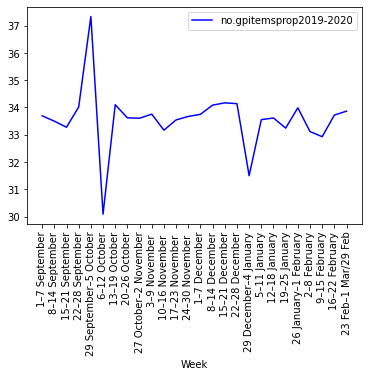

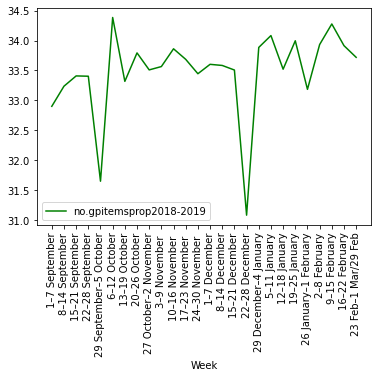

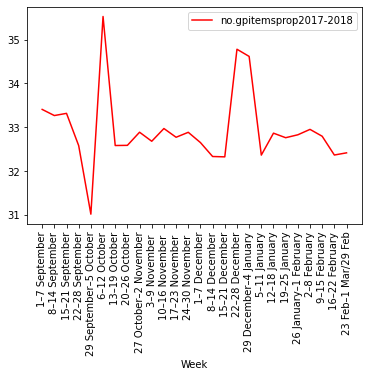

<Figure size 432x288 with 0 Axes>

In [40]:

#ax = plt.gca()
graph_prop_19nsw20.plot(
    kind = 'line', #it's the default kind
    x = 'Week',
    y = 'no.gpitemsprop2019-2020',
    color = 'blue',
    xticks = [x for x in range(len(graph_gpitems_nsw['Week']))]
    #xticks = [x for x in range(len(graph_prop_19nsw20['Week']))],
)
plt.legend()
ax = plt.gca()
figsize = [15, 20]

plt.draw()

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

plt.show()
#plt.savefig('plot.png')
#plt.clf()
graph_prop_18nsw19.plot(
    kind = 'line', # it's the default kind
    color = 'green',
    x = 'Week',
    y = 'no.gpitemsprop2018-2019',
    xticks = [x for x in range(len(graph_prop_19nsw20['Week']))],
)
plt.legend()
ax1 = plt.gca()
figsize = [15, 20]

plt.draw()
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)



#plt.savefig('plota.png')
#plt.clf()
graph_prop_17nsw18.plot(
    kind = 'line', # You don't need this - it's the default kind
    color = 'red',
    x = 'Week',
    y = 'no.gpitemsprop2017-2018',
    xticks = [x for x in range(len(graph_prop_19nsw20['Week']))],
)
plt.legend()
ax2 = plt.gca()
figsize = [15, 20]


plt.draw()

for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
plt.show()
plt.savefig('plot.png')

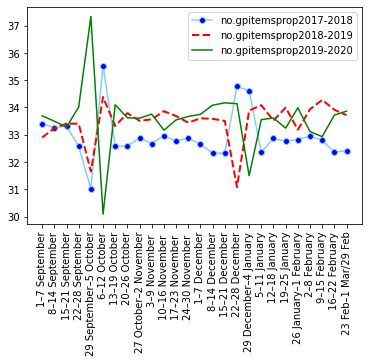

In [41]:
plt.plot( 'Week','no.gpitemsprop2017-2018', data=graph_prop_17nsw18 , marker='o', markerfacecolor='blue',  color='skyblue')#, linewidth=markersize=12,4)
plt.plot( 'Week','no.gpitemsprop2018-2019', data=graph_prop_18nsw19, marker='', color='red', linestyle='dashed',linewidth=2)
plt.plot( 'Week','no.gpitemsprop2019-2020', data=graph_prop_19nsw20, marker='', color='green')#  label="lowest"), linewidth=2
plt.xticks = [x for x in range(len(graph_gpitems_nsw['Week']))]
plt.legend()
ax = plt.gca()
figsize = [15, 20]

plt.draw()

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

plt.show()


Looking at the outcome, 2019-2020 bushfire season in NSW called for slightly more GP MBS items claim as compared to year 2018-2019.However year 2017-2018 demand stays moderately low

## Question 2:

Calculate and compare the proportion of the number of GP MBS items acquired in each given week of the years 2017-2018, 2018-2019 and 2019-2020  for  the state  Victoria and ACT respectively, also show the states wise proportion using subplots.


## Solution:

For the state ACT,defining the dataframe having only gp items data and then calculating the proportion of number of GP MBS items claim for the respective years


In [42]:
graph_gpitems_act = itemsgpresp_act_df[['Week', '2017-2018:n_itemsgpact', '2018-2019:n_itemsgpact','2019-2020:n_itemsgpact']].copy()
graph_gpitems_act['2017-2018:n_itemsgpact'] = graph_gpitems_act['2017-2018:n_itemsgpact'].astype(float)
graph_gpitems_act['2018-2019:n_itemsgpact'] = graph_gpitems_act['2018-2019:n_itemsgpact'].astype(float)
graph_gpitems_act['2019-2020:n_itemsgpact'] = graph_gpitems_act['2019-2020:n_itemsgpact'].astype(float)
graph_gpitems_act['total_no_of_gp_items_act']=graph_gpitems_act['2017-2018:n_itemsgpact']+ graph_gpitems_act ['2019-2020:n_itemsgpact']+graph_gpitems_act ['2018-2019:n_itemsgpact']
graph_gpitems_act['no.gpitemsprop2019-2020']=(graph_gpitems_act ['2019-2020:n_itemsgpact']/graph_gpitems_act['total_no_of_gp_items_act'])*100
graph_prop_19act20= graph_gpitems_act[['Week','no.gpitemsprop2019-2020']] #[#df4 = df.groupby(['City1', 'City2'])[['Seats','PassengerTrips']].sum()
graph_gpitems_act['no.gpitemsprop2018-2019']=(graph_gpitems_act ['2018-2019:n_itemsgpact']/graph_gpitems_act['total_no_of_gp_items_act'])*100
graph_gpitems_act['no.gpitemsprop2017-2018']=(graph_gpitems_act ['2017-2018:n_itemsgpact']/graph_gpitems_act['total_no_of_gp_items_act'])*100
graph_prop_18act19 = graph_gpitems_act[['Week','no.gpitemsprop2018-2019']]
graph_prop_17act18= graph_gpitems_act[['Week','no.gpitemsprop2017-2018']]


In [43]:
#Proportion of the number of GP items claimed weekly for the year 2017-2018 in ACT
graph_prop_17act18

,Week,no.gpitemsprop2017-2018
0,1–7 September,32.526330
1,8–14 September,33.639309
2,15–21 September,32.859700
3,22–28 September,29.392765
4,29 September–5 October,30.423409
5,6–12 October,34.944077
6,13–19 October,32.350096
7,20–26 October,32.124867
8,27 October–2 November,32.090625
9,3–9 November,32.842824


In [44]:
#Proportion of the number of GP items claimed weekly for the year 2018-2019 in ACT
graph_prop_18act19

,Week,no.gpitemsprop2018-2019
0,1–7 September,32.967799
1,8–14 September,32.326865
2,15–21 September,32.916778
3,22–28 September,34.569942
4,29 September–5 October,31.090363
5,6–12 October,34.437280
6,13–19 October,32.897442
7,20–26 October,33.846795
8,27 October–2 November,33.087114
9,3–9 November,33.411751


In [45]:
#Proportion of the number of GP items claimed weekly for the year 2019-2020 in ACT
graph_prop_19act20

,Week,no.gpitemsprop2019-2020
0,1–7 September,34.505871
1,8–14 September,34.033826
2,15–21 September,34.223522
3,22–28 September,36.037292
4,29 September–5 October,38.486227
5,6–12 October,30.618643
6,13–19 October,34.752462
7,20–26 October,34.028338
8,27 October–2 November,34.822261
9,3–9 November,33.745425


For the state Victoria:

In [46]:
graph_gpitems_victoria= itemsgpresp_victoria_df[['Week', '2017-2018:n_itemsgpvictoria', '2018-2019:n_itemsgpvictoria','2019-2020:n_itemsgpvictoria']].copy()
graph_gpitems_victoria['2017-2018:n_itemsgpvictoria'] = graph_gpitems_victoria['2017-2018:n_itemsgpvictoria'].astype(float)
graph_gpitems_victoria['2018-2019:n_itemsgpvictoria'] = graph_gpitems_victoria['2018-2019:n_itemsgpvictoria'].astype(float)
graph_gpitems_victoria['2019-2020:n_itemsgpvictoria'] = graph_gpitems_victoria['2019-2020:n_itemsgpvictoria'].astype(float)
graph_gpitems_victoria['total_no_of_gp_items_victoria']=graph_gpitems_victoria['2017-2018:n_itemsgpvictoria']+ graph_gpitems_victoria ['2019-2020:n_itemsgpvictoria']+graph_gpitems_victoria ['2018-2019:n_itemsgpvictoria']
graph_gpitems_victoria['no.gpitemsprop2019-2020']=(graph_gpitems_victoria ['2019-2020:n_itemsgpvictoria']/graph_gpitems_victoria['total_no_of_gp_items_victoria'])*100
graph_prop_19victoria20= graph_gpitems_victoria[['Week','no.gpitemsprop2019-2020']] #[#df4 = df.groupby(['City1', 'City2'])[['Seats','PassengerTrips']].sum()
graph_gpitems_victoria['no.gpitemsprop2018-2019']=(graph_gpitems_victoria ['2018-2019:n_itemsgpvictoria']/graph_gpitems_victoria['total_no_of_gp_items_victoria'])*100
graph_gpitems_victoria['no.gpitemsprop2017-2018']=(graph_gpitems_victoria ['2017-2018:n_itemsgpvictoria']/graph_gpitems_victoria['total_no_of_gp_items_victoria'])*100
graph_prop_18victoria19 = graph_gpitems_victoria[['Week','no.gpitemsprop2018-2019']]
graph_prop_17victoria18= graph_gpitems_victoria[['Week','no.gpitemsprop2017-2018']]


In [47]:
#Proportion of the number of GP items claimed weekly for the year 2017-2018 in Victoria
graph_prop_17victoria18

,Week,no.gpitemsprop2017-2018
0,1–7 September,33.062236
1,8–14 September,33.436852
2,15–21 September,33.688371
3,22–28 September,36.624643
4,29 September–5 October,29.930724
5,6–12 October,32.588850
6,13–19 October,32.203994
7,20–26 October,32.822464
8,27 October–2 November,32.896152
9,3–9 November,32.451732


In [48]:
#Proportion of the number of GP items claimed weekly for the year 2018-2019 in Victoria
graph_prop_18victoria19

,Week,no.gpitemsprop2018-2019
0,1–7 September,32.785441
1,8–14 September,32.802301
2,15–21 September,32.455435
3,22–28 September,31.162170
4,29 September–5 October,34.582839
5,6–12 October,33.202281
6,13–19 October,33.498495
7,20–26 October,33.332315
8,27 October–2 November,33.173784
9,3–9 November,33.135167


In [49]:
#Proportion of the number of GP items claimed weekly for the year 2019-2020 in Victoria
graph_prop_19victoria20

,Week,no.gpitemsprop2019-2020
0,1–7 September,34.152323
1,8–14 September,33.760847
2,15–21 September,33.856194
3,22–28 September,32.213186
4,29 September–5 October,35.486437
5,6–12 October,34.208869
6,13–19 October,34.297512
7,20–26 October,33.845221
8,27 October–2 November,33.930064
9,3–9 November,34.413101


Now lets plot all three states with their repective weekly proportion of the number of GP MBS items claim for the respecive years

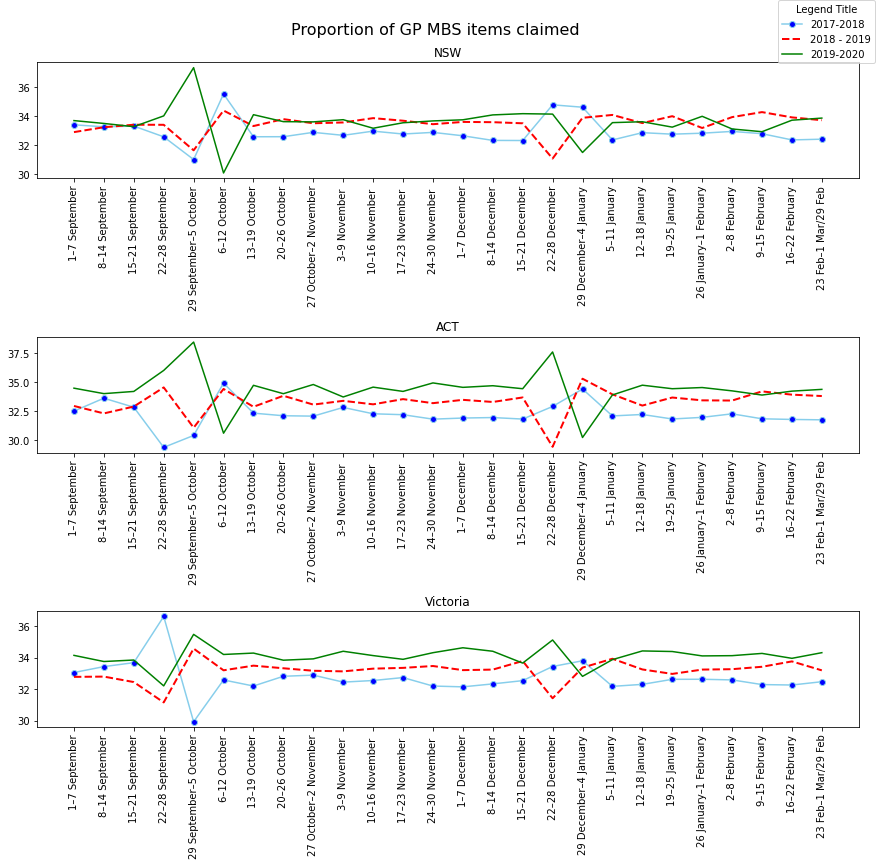

In [50]:

fig = plt.figure(figsize=(12, 12))
fig.suptitle('Proportion of GP MBS items claimed \n', fontsize = 16)
             #in the states\n NSW, ACT and Victoria\n for the months Sept.-Feb. in years 2017-2018, 2018-2019, 2019-2020\n\n')

ax = fig.add_subplot(3, 1, 1)
ax.plot('Week','no.gpitemsprop2017-2018', data=graph_prop_17nsw18 , marker='o', markerfacecolor='blue',  color='skyblue')
ax.plot( 'Week','no.gpitemsprop2018-2019', data=graph_prop_18nsw19, marker='', color='red', linestyle='dashed',linewidth=2)
ax.plot( 'Week','no.gpitemsprop2019-2020', data=graph_prop_19nsw20, marker='', color='green')
ax.set_title("\n\nNSW")
plt.xticks = [x for x in range(len(graph_gpitems_nsw['Week']))]
#plt.legend()
ax = plt.gca()
#figsize = [15, 20]

plt.draw()

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

ax = fig.add_subplot(3, 1, 2)
ax.plot('Week','no.gpitemsprop2017-2018', data=graph_prop_17act18 , marker='o', markerfacecolor='blue',  color='skyblue')
ax.plot( 'Week','no.gpitemsprop2018-2019', data=graph_prop_18act19, marker='', color='red', linestyle='dashed',linewidth=2)
ax.plot( 'Week','no.gpitemsprop2019-2020', data=graph_prop_19act20, marker='', color='green')
ax.set_title("ACT")
plt.xticks = [x for x in range(len(graph_gpitems_nsw['Week']))]
#plt.legend()
ax = plt.gca()
#figsize = [15, 20]

plt.draw()

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

ax = fig.add_subplot(3, 1, 3)
ax.plot('Week','no.gpitemsprop2017-2018', data=graph_prop_17victoria18 , marker='o', markerfacecolor='blue',  color='skyblue')
ax.plot( 'Week','no.gpitemsprop2018-2019', data=graph_prop_18victoria19, marker='', color='red', linestyle='dashed',linewidth=2)
ax.plot( 'Week','no.gpitemsprop2019-2020', data=graph_prop_19victoria20, marker='', color='green')
ax.set_title("Victoria")
plt.xticks = [x for x in range(len(graph_gpitems_victoria['Week']))]
#plt.legend()
ax = plt.gca()
#figsize = [15, 20]
line_labels = ['2017-2018', '2018 - 2019', '2019-2020']
plt.draw()

for tick in ax.get_xticklabels():
    tick.set_rotation(90)
fig.legend(
           labels=line_labels,   # The labels for each line
           #loc="top right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Legend Title"  # Title for the legend
           )



fig.tight_layout()
fig.savefig('plot.png')



Looking at the figures, with every year GP MBS items claims have increased for the bushfire seasons. Year 2019-2020 seems to have experienced the greatest demand for all three states.

# Question : 3

Show the comparison of the  Proportion of no. of respiratory MBS items claimed between the states 'NSW', 'ACT' and 'Victoria for the month September-February in years 2017-2018, 2018-2019, 2019-2020.

# Solution:

For this solution, we will first make the dataframes with respect to years and calculate the proprtion aongst states for each week.

In [51]:
#collecting the required columns
df1_respitems_nsw= itemsgpresp_nsw_df[['Week', '2017-2018:n_itemsrespnsw', '2018-2019:n_itemsrespnsw','2019-2020:n_itemsrespnsw']].copy()
df1_respitems_act = itemsgpresp_act_df[['Week', '2017-2018:n_itemsrespact', '2018-2019:n_itemsrespact','2019-2020:n_itemsrespact']].copy()
df1_respitems_victoria = itemsgpresp_victoria_df[['Week', '2017-2018:n_itemsrespvictoria', '2018-2019:n_itemsrespvictoria','2019-2020:n_itemsrespvictoria']].copy()
#merging dataframes
df1_respitems = df1_respitems_nsw.merge(df1_respitems_act,on = 'Week', how = 'left')# suffixes=('_itemsgpnsw','_itemsrespnsw'))
df1_respitems = df1_respitems.merge(df1_respitems_victoria,on = 'Week', how = 'left')
#making new dataframes,selecting the columns for the same year 
df1_respitems_20172018= df1_respitems[['Week', '2017-2018:n_itemsrespnsw', '2017-2018:n_itemsrespvictoria', '2017-2018:n_itemsrespact']].copy()
df1_respitems_20182019= df1_respitems[['Week', '2018-2019:n_itemsrespnsw', '2018-2019:n_itemsrespvictoria', '2018-2019:n_itemsrespact']].copy()
df1_respitems_20192020= df1_respitems[['Week', '2019-2020:n_itemsrespnsw', '2019-2020:n_itemsrespvictoria', '2019-2020:n_itemsrespact']].copy()


Calculating the proportion of number of respiratory tests MBS claims amongst the states for each week of the year 

In [52]:

df1_respitems_20172018['2017-2018:n_itemsrespact'] = df1_respitems_20172018['2017-2018:n_itemsrespact'].astype(float)
df1_respitems_20172018['2017-2018:n_itemsrespnsw'] = df1_respitems_20172018['2017-2018:n_itemsrespnsw'].astype(float)
df1_respitems_20172018['2017-2018:n_itemsrespvictoria'] = df1_respitems_20172018['2017-2018:n_itemsrespvictoria'].astype(float)
df1_respitems_20172018['total_no_of_resp_items_20172018'] = df1_respitems_20172018['2017-2018:n_itemsrespact'] +df1_respitems_20172018['2017-2018:n_itemsrespnsw']+df1_respitems_20172018['2017-2018:n_itemsrespvictoria'] 
df1_respitems_20172018['no.respitemspropnsw'] =df1_respitems_20172018['2017-2018:n_itemsrespnsw']/ df1_respitems_20172018['total_no_of_resp_items_20172018']*100
df1_respitems_20172018['no.respitemspropnsw'] =np.round(df1_respitems_20172018['no.respitemspropnsw'], decimals= 2)
df1_respitems_20172018['no.respitemspropact'] =df1_respitems_20172018['2017-2018:n_itemsrespact']/ df1_respitems_20172018['total_no_of_resp_items_20172018']*100
df1_respitems_20172018['no.respitemspropact'] = np.round(df1_respitems_20172018['no.respitemspropact'], decimals = 2)
df1_respitems_20172018['no.respitemspropvictoria'] =df1_respitems_20172018['2017-2018:n_itemsrespvictoria']/ df1_respitems_20172018['total_no_of_resp_items_20172018']*100
df1_respitems_20172018['no.respitemspropvictoria'] = np.round(df1_respitems_20172018['no.respitemspropvictoria'], decimals =2)
df1_prop_respitems20172018 = df1_respitems_20172018[['Week','no.respitemspropnsw','no.respitemspropact','no.respitemspropvictoria' ]].copy() 

df1_respitems_nsw['2017-2018:n_itemsrespnsw'] = df1_respitems_nsw['2017-2018:n_itemsrespnsw'].astype(float)
df1_respitems_nsw['2018-2019:n_itemsrespnsw'] = df1_respitems_nsw['2018-2019:n_itemsrespnsw'].astype(float)
df1_respitems_nsw['2019-2020:n_itemsrespnsw'] = df1_respitems_nsw['2019-2020:n_itemsrespnsw'].astype(float)
df1_respitems_nsw['total_no_of_resp_items_nsw'] = df1_respitems_nsw['2017-2018:n_itemsrespnsw'] +df1_respitems_nsw['2018-2019:n_itemsrespnsw']+df1_respitems_nsw['2019-2020:n_itemsrespnsw'] 
df1_respitems_nsw['no.respitemsprop20172018'] =df1_respitems_nsw['2017-2018:n_itemsrespnsw']/ df1_respitems_nsw['total_no_of_resp_items_nsw']*100
df1_respitems_nsw['no.respitemsprop20172018'] =np.round(df1_respitems_nsw['no.respitemsprop20172018'], decimals= 2)
df1_respitems_nsw['no.respitemsprop20182019'] =df1_respitems_nsw['2018-2019:n_itemsrespnsw']/ df1_respitems_nsw['total_no_of_resp_items_nsw']*100
df1_respitems_nsw['no.respitemsprop20182019'] = np.round(df1_respitems_nsw['no.respitemsprop20182019'], decimals = 2)
df1_respitems_nsw['no.respitemsprop20192020'] =df1_respitems_nsw['2019-2020:n_itemsrespnsw']/ df1_respitems_nsw['total_no_of_resp_items_nsw']*100
df1_respitems_nsw['no.respitemsprop20192020'] = np.round(df1_respitems_nsw['no.respitemsprop20192020'], decimals =2)
df1_prop_respitemsnsw = df1_respitems_nsw[['Week','no.respitemsprop20172018','no.respitemsprop20182019','no.respitemsprop20192020' ]].copy() 
df1_prop_respnsw = df1_prop_respitemsnsw.copy()
#y = [('','','Week'),('NSW','2017-2018','n'),('NSW','2018-2019','n'),('NSW','2019-2020','n')]
#columnsidy = pd.MultiIndex.from_tuples(y)
#df1_prop_respitemsnsw.columns = columnsidy


#x = [('','','Week'),('2017-2018','NSW','n'),('2017-2018','ACT','n'),('2017-2018','Victoria','n')]
#columnsidx = pd.MultiIndex.from_tuples(x)
#df1_prop_respitems20172018.columns = columnsidx
#df1_prop_respitemsnsw

In [53]:
#Proportion of the number of respiratory test MBS claims for the states for the year 2017-2018
df1_prop_respitems20172018

,Week,no.respitemspropnsw,no.respitemspropact,no.respitemspropvictoria
0,1–7 September,63.83,1.48,34.70
1,8–14 September,61.99,1.60,36.41
2,15–21 September,62.90,1.46,35.64
3,22–28 September,63.61,1.12,35.28
4,29 September–5 October,60.96,1.33,37.72
5,6–12 October,62.71,1.50,35.79
6,13–19 October,60.83,1.62,37.55
7,20–26 October,62.18,1.85,35.97
8,27 October–2 November,60.32,1.82,37.85
9,3–9 November,67.34,1.95,30.71


In [54]:
#Proportion of the number of respiratory test MBS claims for the states for the year 2018-2019

df1_respitems_20182019['2018-2019:n_itemsrespact'] = df1_respitems_20182019['2018-2019:n_itemsrespact'].astype(float)
df1_respitems_20182019['2018-2019:n_itemsrespnsw'] = df1_respitems_20182019['2018-2019:n_itemsrespnsw'].astype(float)
df1_respitems_20182019['2018-2019:n_itemsrespvictoria'] = df1_respitems_20182019['2018-2019:n_itemsrespvictoria'].astype(float)
df1_respitems_20182019['total_no_of_resp_items_20182019'] = df1_respitems_20182019['2018-2019:n_itemsrespact'] +df1_respitems_20182019['2018-2019:n_itemsrespnsw']+df1_respitems_20182019['2018-2019:n_itemsrespvictoria'] 
df1_respitems_20182019['no.respitemspropnsw'] =df1_respitems_20182019['2018-2019:n_itemsrespnsw']/ df1_respitems_20182019['total_no_of_resp_items_20182019']*100
df1_respitems_20182019['no.respitemspropnsw'] =np.round(df1_respitems_20182019['no.respitemspropnsw'], decimals= 2)
df1_respitems_20182019['no.respitemspropact'] =df1_respitems_20182019['2018-2019:n_itemsrespact']/ df1_respitems_20182019['total_no_of_resp_items_20182019']*100
df1_respitems_20182019['no.respitemspropact'] = np.round(df1_respitems_20182019['no.respitemspropact'], decimals = 2)
df1_respitems_20182019['no.respitemspropvictoria'] =df1_respitems_20182019['2018-2019:n_itemsrespvictoria']/ df1_respitems_20182019['total_no_of_resp_items_20182019']*100
df1_respitems_20182019['no.respitemspropvictoria'] = np.round(df1_respitems_20182019['no.respitemspropvictoria'], decimals =2)
df1_prop_respitems20182019 = df1_respitems_20182019[['Week','no.respitemspropnsw','no.respitemspropact','no.respitemspropvictoria' ]] 
df1_prop_respitems20182019 

,Week,no.respitemspropnsw,no.respitemspropact,no.respitemspropvictoria
0,1–7 September,61.86,1.35,36.78
1,8–14 September,62.58,1.89,35.53
2,15–21 September,61.96,1.89,36.15
3,22–28 September,66.36,1.94,31.70
4,29 September–5 October,57.15,1.15,41.70
5,6–12 October,61.03,1.34,37.63
6,13–19 October,61.50,1.27,37.23
7,20–26 October,62.73,1.60,35.67
8,27 October–2 November,62.40,1.61,35.99
9,3–9 November,68.10,1.78,30.12


In [55]:
#Proportion of the number of respiratory test MBS claims for the states for the year 2019-2020
df1_respitems_20192020['2019-2020:n_itemsrespact'] = df1_respitems_20192020['2019-2020:n_itemsrespact'].astype(float)
df1_respitems_20192020['2019-2020:n_itemsrespnsw'] = df1_respitems_20192020['2019-2020:n_itemsrespnsw'].astype(float)
df1_respitems_20192020['2019-2020:n_itemsrespvictoria'] = df1_respitems_20192020['2019-2020:n_itemsrespvictoria'].astype(float)
df1_respitems_20192020['total_no_of_resp_items_20192020'] = df1_respitems_20192020['2019-2020:n_itemsrespact'] +df1_respitems_20192020['2019-2020:n_itemsrespnsw']+df1_respitems_20192020['2019-2020:n_itemsrespvictoria'] 
df1_respitems_20192020['no.respitemspropnsw'] =df1_respitems_20192020['2019-2020:n_itemsrespnsw']/ df1_respitems_20192020['total_no_of_resp_items_20192020']*100
df1_respitems_20192020['no.respitemspropnsw'] =np.round(df1_respitems_20192020['no.respitemspropnsw'], decimals= 2)
df1_respitems_20192020['no.respitemspropact'] =df1_respitems_20192020['2019-2020:n_itemsrespact']/ df1_respitems_20192020['total_no_of_resp_items_20192020']*100
df1_respitems_20192020['no.respitemspropact'] = np.round(df1_respitems_20192020['no.respitemspropact'], decimals = 2)
df1_respitems_20192020['no.respitemspropvictoria'] =df1_respitems_20192020['2019-2020:n_itemsrespvictoria']/ df1_respitems_20192020['total_no_of_resp_items_20192020']*100
df1_respitems_20192020['no.respitemspropvictoria'] = np.round(df1_respitems_20192020['no.respitemspropvictoria'], decimals =2)
df1_prop_respitems20192020 = df1_respitems_20192020[['Week','no.respitemspropnsw','no.respitemspropact','no.respitemspropvictoria' ]] 
df1_prop_respitems20192020 
df1_prop_respitems20192020

,Week,no.respitemspropnsw,no.respitemspropact,no.respitemspropvictoria
0,1–7 September,62.12,1.67,36.21
1,8–14 September,60.11,1.61,38.29
2,15–21 September,62.47,1.57,35.97
3,22–28 September,65.00,1.82,33.18
4,29 September–5 October,59.74,1.46,38.80
5,6–12 October,54.58,1.33,44.08
6,13–19 October,59.71,1.39,38.90
7,20–26 October,60.26,1.64,38.10
8,27 October–2 November,60.26,1.56,38.18
9,3–9 November,66.40,1.69,31.91


Graphical representation:

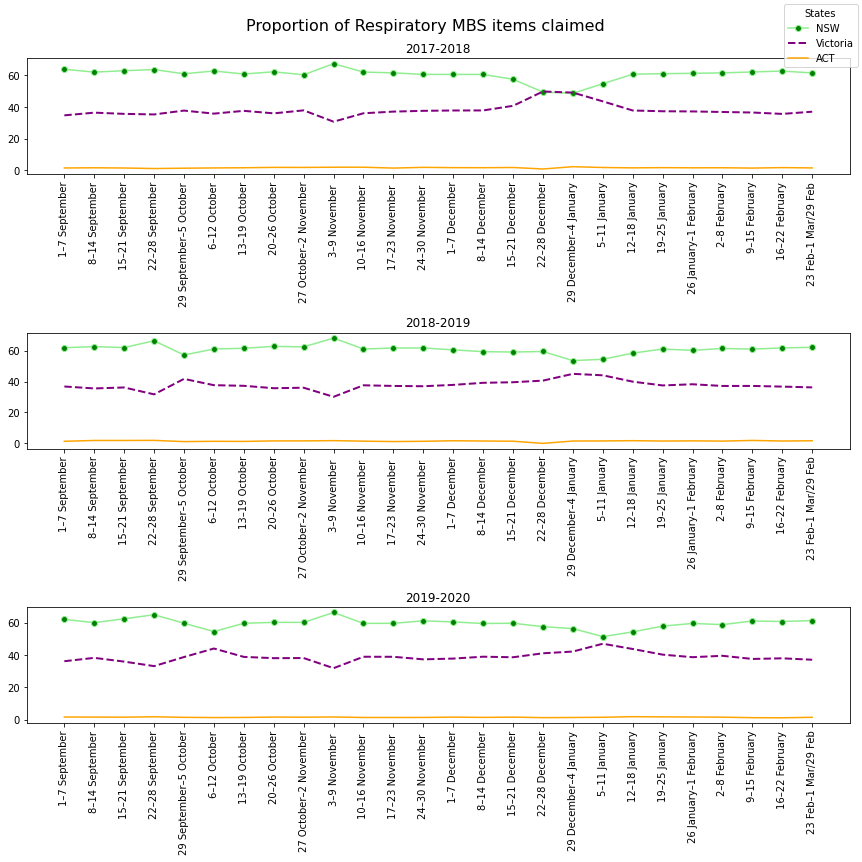

In [56]:

fig3 = plt.figure(figsize=(12, 12))
fig3.suptitle('Proportion of Respiratory MBS items claimed \n', fontsize = 16)
        #in the states\n NSW, ACT and Victoria\n for the months Sept.-Feb. in years 2017-2018, 2018-2019, 2019-2020\n\n')

ax = fig3.add_subplot(3, 1, 1)
ax.plot('Week','no.respitemspropnsw', data=df1_prop_respitems20172018, marker='o', markerfacecolor='green',  color='lightgreen')
ax.plot( 'Week','no.respitemspropvictoria', data=df1_prop_respitems20172018, marker='', color='purple', linestyle='dashed',linewidth=2)
ax.plot( 'Week','no.respitemspropact', data=df1_prop_respitems20172018, marker='', color='orange')
ax.set_title("\n \n2017-2018")
plt.xticks = [x for x in range(len(df1_prop_respitems20172018['Week']))]
#plt.legend()
ax = plt.gca()
#figsize = [15, 20]

plt.draw()

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

ax = fig3.add_subplot(3, 1, 2)
ax.plot('Week','no.respitemspropnsw', data=df1_prop_respitems20182019, marker='o', markerfacecolor='green',  color='lightgreen')
ax.plot( 'Week','no.respitemspropvictoria', data=df1_prop_respitems20182019, marker='', color='purple', linestyle='dashed',linewidth=2)
ax.plot( 'Week','no.respitemspropact', data=df1_prop_respitems20182019, marker='', color='orange')
ax.set_title("2018-2019")
plt.xticks = [x for x in range(len(df1_prop_respitems20182019['Week']))]
#plt.legend()
ax = plt.gca()
#figsize = [15, 20]

plt.draw()

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

ax = fig3.add_subplot(3, 1, 3)
ax.plot('Week','no.respitemspropnsw', data=df1_prop_respitems20192020, marker='o', markerfacecolor='green',  color='lightgreen')
ax.plot( 'Week','no.respitemspropvictoria', data=df1_prop_respitems20192020, marker='', color='purple', linestyle='dashed',linewidth=2)
ax.plot( 'Week','no.respitemspropact', data=df1_prop_respitems20192020, marker='', color='orange')
ax.set_title("2019-2020")
plt.xticks = [x for x in range(len(df1_prop_respitems20192020['Week']))]
#plt.legend()
ax = plt.gca()
#figsize = [15, 20]
line_labels = ['NSW', 'Victoria', 'ACT']
plt.draw()

for tick in ax.get_xticklabels():
    tick.set_rotation(90)
fig3.legend(#[l1, l2, l3],     # The line objects
           labels=line_labels,   # The labels for each line
           #loc="upper right",   # Position of legend
           #borderaxespad=0.001,    # Small spacing around legend box
           title="States"  # Title for the legend
           )

#fig.legend(title='Legend')

fig3.tight_layout()
fig3.savefig('plot4.png')


Each year clearly shows the high demand in NSW, then Victoria and then ACT. But this demand has got greatly to do with the size of the population in the respective states. 

## Question: 4

Calculate and compare the proportion of the number of respiratory MBS items claimed in each given week of the years 2017-2018, 2018-2019 and 2019-2020  for  the given states respectively.

Lets calculate the weekly proportion of the number of respiratory test MBS claims for the given years for the state ACT 

In [57]:
#making new dataframes on the basis of same state
df1_respitems_nsw= df1_respitems[['Week', '2017-2018:n_itemsrespnsw','2018-2019:n_itemsrespnsw', '2019-2020:n_itemsrespnsw']].copy()
df1_respitems_act= df1_respitems[['Week','2017-2018:n_itemsrespact', '2018-2019:n_itemsrespact','2019-2020:n_itemsrespact']].copy()
df1_respitems_victoria= df1_respitems[['Week', '2017-2018:n_itemsrespvictoria','2018-2019:n_itemsrespvictoria', '2019-2020:n_itemsrespvictoria']].copy()

df1_respitems_act['2017-2018:n_itemsrespact'] = df1_respitems_act['2017-2018:n_itemsrespact'].astype(float)
df1_respitems_act['2018-2019:n_itemsrespact'] = df1_respitems_act['2018-2019:n_itemsrespact'].astype(float)
df1_respitems_act['2019-2020:n_itemsrespact'] = df1_respitems_act['2019-2020:n_itemsrespact'].astype(float)
df1_respitems_act['total_no_of_resp_items_act'] = df1_respitems_act['2017-2018:n_itemsrespact'] +df1_respitems_act['2018-2019:n_itemsrespact']+df1_respitems_act['2019-2020:n_itemsrespact'] 
df1_respitems_act['no.respitemsprop20172018'] =df1_respitems_act['2017-2018:n_itemsrespact']/ df1_respitems_act['total_no_of_resp_items_act']*100
df1_respitems_act['no.respitemsprop20172018'] =np.round(df1_respitems_act['no.respitemsprop20172018'], decimals= 2)
df1_respitems_act['no.respitemsprop20182019'] =df1_respitems_act['2018-2019:n_itemsrespact']/ df1_respitems_act['total_no_of_resp_items_act']*100
df1_respitems_act['no.respitemsprop20182019'] = np.round(df1_respitems_act['no.respitemsprop20182019'], decimals = 2)
df1_respitems_act['no.respitemsprop20192020'] =df1_respitems_act['2019-2020:n_itemsrespact']/ df1_respitems_act['total_no_of_resp_items_act']*100
df1_respitems_act['no.respitemsprop20192020'] = np.round(df1_respitems_act['no.respitemsprop20192020'], decimals =2)
df1_prop_respitemsact = df1_respitems_act[['Week','no.respitemsprop20172018','no.respitemsprop20182019','no.respitemsprop20192020' ]] 
df1_prop_respact = df1_prop_respitemsact
df1_prop_respact


,Week,no.respitemsprop20172018,no.respitemsprop20182019,no.respitemsprop20192020
0,1–7 September,32.47,30.07,37.46
1,8–14 September,29.83,37.68,32.49
2,15–21 September,30.06,37.24,32.70
3,22–28 September,24.71,39.73,35.56
4,29 September–5 October,31.74,29.54,38.71
5,6–12 October,38.15,34.04,27.81
6,13–19 October,38.75,29.75,31.50
7,20–26 October,36.52,32.53,30.95
8,27 October–2 November,36.05,32.53,31.42
9,3–9 November,36.82,32.52,30.66


for the state Victoria

In [58]:
df1_respitems_victoria['2017-2018:n_itemsrespvictoria'] = df1_respitems_victoria['2017-2018:n_itemsrespvictoria'].astype(float)
df1_respitems_victoria['2018-2019:n_itemsrespvictoria'] = df1_respitems_victoria['2018-2019:n_itemsrespvictoria'].astype(float)
df1_respitems_victoria['2019-2020:n_itemsrespvictoria'] = df1_respitems_victoria['2019-2020:n_itemsrespvictoria'].astype(float)
df1_respitems_victoria['total_no_of_resp_items_victoria'] = df1_respitems_victoria['2017-2018:n_itemsrespvictoria'] +df1_respitems_victoria['2018-2019:n_itemsrespvictoria']+df1_respitems_victoria['2019-2020:n_itemsrespvictoria'] 
df1_respitems_victoria['no.respitemsprop20172018'] =df1_respitems_victoria['2017-2018:n_itemsrespvictoria']/ df1_respitems_victoria['total_no_of_resp_items_victoria']*100
df1_respitems_victoria['no.respitemsprop20172018'] =np.round(df1_respitems_victoria['no.respitemsprop20172018'], decimals= 2)
df1_respitems_victoria['no.respitemsprop20182019'] =df1_respitems_victoria['2018-2019:n_itemsrespvictoria']/ df1_respitems_victoria['total_no_of_resp_items_victoria']*100
df1_respitems_victoria['no.respitemsprop20182019'] = np.round(df1_respitems_victoria['no.respitemsprop20182019'], decimals = 2)
df1_respitems_victoria['no.respitemsprop20192020'] =df1_respitems_victoria['2019-2020:n_itemsrespvictoria']/ df1_respitems_victoria['total_no_of_resp_items_victoria']*100
df1_respitems_victoria['no.respitemsprop20192020'] = np.round(df1_respitems_victoria['no.respitemsprop20192020'], decimals =2)
df1_prop_respitemsvictoria = df1_respitems_victoria[['Week','no.respitemsprop20172018','no.respitemsprop20182019','no.respitemsprop20192020' ]] 
df1_prop_respvictoria=df1_prop_respitemsvictoria
df1_prop_respvictoria

,Week,no.respitemsprop20172018,no.respitemsprop20182019,no.respitemsprop20192020
0,1–7 September,31.89,34.15,33.96
1,8–14 September,31.40,32.81,35.79
2,15–21 September,33.40,32.46,34.14
3,22–28 September,37.57,31.24,31.19
4,29 September–5 October,30.08,35.60,34.33
5,6–12 October,32.77,34.23,33.01
6,13–19 October,33.87,32.83,33.30
7,20–26 October,32.98,33.59,33.42
8,27 October–2 November,33.39,32.41,34.20
9,3–9 November,33.89,32.27,33.84


for the state NSW , and realligning the column names of each dataframes 

In [59]:
df1_prop = df1_prop_respnsw.merge(df1_prop_respact, on = 'Week', how = 'left', suffixes=('_nsw','_act'))
df1_prop = df1_prop.merge(df1_prop_respvictoria, on = 'Week', how = 'left')#,suffixes=('-','_victoria'))
df1_17prop18 = df1_prop[['Week', 'no.respitemsprop20172018_nsw','no.respitemsprop20172018_act','no.respitemsprop20172018']]
df1_18prop19 = df1_prop[['Week', 'no.respitemsprop20182019_nsw','no.respitemsprop20182019_act','no.respitemsprop20182019']]
df1_19prop20 = df1_prop[['Week', 'no.respitemsprop20192020_nsw','no.respitemsprop20192020_act','no.respitemsprop20192020']]
df1_propnsw = df1_prop[['Week','no.respitemsprop20172018_nsw','no.respitemsprop20182019_nsw','no.respitemsprop20192020_nsw']]
df1_propact = df1_prop[['Week','no.respitemsprop20172018_act','no.respitemsprop20182019_act','no.respitemsprop20192020_act']]
df1_propvictoria = df1_prop[['Week','no.respitemsprop20172018','no.respitemsprop20182019','no.respitemsprop20192020']]
df1_prop

,Week,no.respitemsprop20172018_nsw,no.respitemsprop20182019_nsw,no.respitemsprop20192020_nsw,no.respitemsprop20172018_act,no.respitemsprop20182019_act,no.respitemsprop20192020_act,no.respitemsprop20172018,no.respitemsprop20182019,no.respitemsprop20192020
0,1–7 September,33.65,32.94,33.42,32.47,30.07,37.46,31.89,34.15,33.96
1,8–14 September,31.92,34.52,33.56,29.83,37.68,32.49,31.40,32.81,35.79
2,15–21 September,33.91,31.99,34.10,30.06,37.24,32.70,33.40,32.46,34.14
3,22–28 September,34.87,33.67,31.46,24.71,39.73,35.56,37.57,31.24,31.19
4,29 September–5 October,32.35,32.47,35.18,31.74,29.54,38.71,30.08,35.60,34.33
5,6–12 October,37.34,36.09,26.57,38.15,34.04,27.81,32.77,34.23,33.01
6,13–19 October,34.25,33.85,31.90,38.75,29.75,31.50,33.87,32.83,33.30
7,20–26 October,33.74,34.96,31.29,36.52,32.53,30.95,32.98,33.59,33.42
8,27 October–2 November,32.57,34.39,33.04,36.05,32.53,31.42,33.39,32.41,34.20
9,3–9 November,34.14,33.51,32.35,36.82,32.52,30.66,33.89,32.27,33.84


Lets graph the weekly proportions on the number of respiratory tests MBS claims for the years 2017-2018, 2018-2019 and 2019-2020 for each state separately 

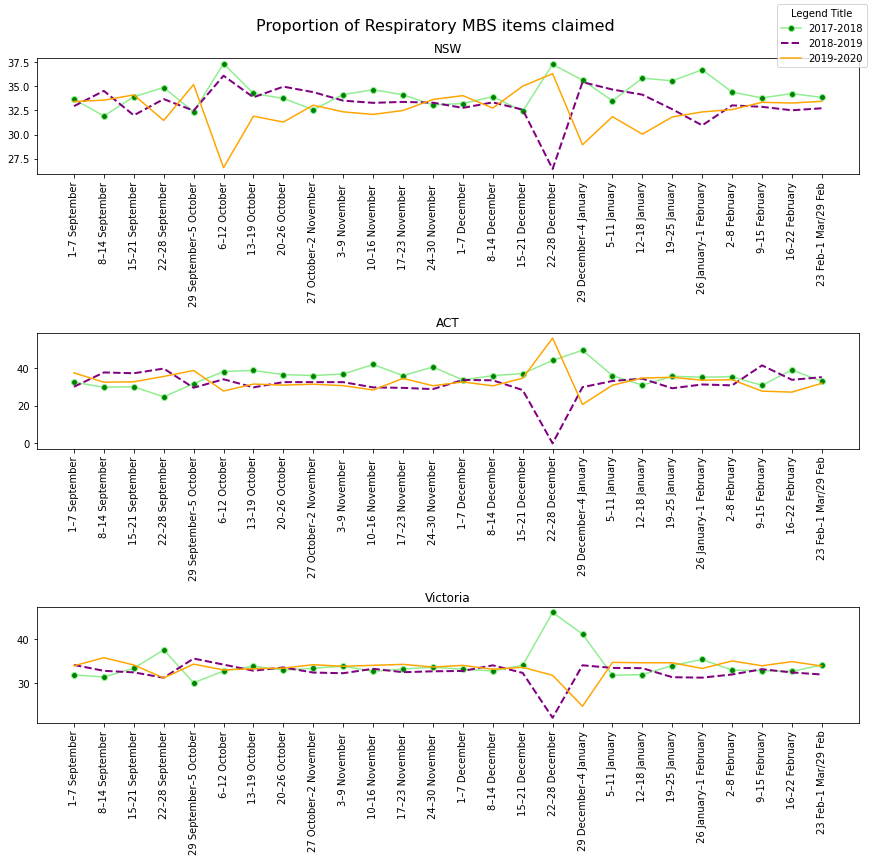

In [60]:

fig2 = plt.figure(figsize=(12, 12))
fig2.suptitle('Proportion of Respiratory MBS items claimed \n', fontsize = 16)
        #in the states\n NSW, ACT and Victoria\n for the months Sept.-Feb. in years 2017-2018, 2018-2019, 2019-2020\n\n')

ax = fig2.add_subplot(3, 1, 1)
ax.plot('Week','no.respitemsprop20172018_nsw', data=df1_propnsw, marker='o', markerfacecolor='green',  color='lightgreen')
ax.plot( 'Week','no.respitemsprop20182019_nsw', data=df1_propnsw, marker='', color='purple', linestyle='dashed',linewidth=2)
ax.plot( 'Week','no.respitemsprop20192020_nsw', data=df1_propnsw, marker='', color='orange')
ax.set_title("\n\nNSW")
plt.xticks = [x for x in range(len(df1_propnsw['Week']))]
#plt.legend()
ax = plt.gca()
#figsize = [15, 20]

plt.draw()

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

ax = fig2.add_subplot(3, 1, 2)
ax.plot('Week','no.respitemsprop20172018_act', data=df1_propact , marker='o', markerfacecolor='green',  color='lightgreen')
ax.plot( 'Week','no.respitemsprop20182019_act', data=df1_propact, marker='', color='purple', linestyle='dashed',linewidth=2)
ax.plot( 'Week','no.respitemsprop20192020_act', data=df1_propact, marker='', color='orange')
ax.set_title("ACT")
plt.xticks = [x for x in range(len(df1_propact['Week']))]
#plt.legend()
ax = plt.gca()
#figsize = [15, 20]

plt.draw()

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

ax = fig2.add_subplot(3, 1, 3)
ax.plot('Week','no.respitemsprop20172018', data=df1_propvictoria, marker='o', markerfacecolor='green',  color='lightgreen')
ax.plot( 'Week','no.respitemsprop20182019', data=df1_propvictoria, marker='', color='purple', linestyle='dashed',linewidth=2)
ax.plot( 'Week','no.respitemsprop20192020', data=df1_propvictoria, marker='', color='orange')
ax.set_title("Victoria")
plt.xticks = [x for x in range(len(df1_propvictoria['Week']))]
#plt.legend()
ax = plt.gca()
#figsize = [15, 20]
line_labels = ['2017-2018', '2018-2019', '2019-2020']
plt.draw()

for tick in ax.get_xticklabels():
    tick.set_rotation(90)
fig2.legend(#[l1, l2, l3],     # The line objects
           labels=line_labels,   # The labels for each line
           #loc="top right",   # Position of legend
           #borderaxespad=0.1,    # Small spacing around legend box
           title="Legend Title"  # Title for the legend
           )

#fig.legend(title='Legend')

fig2.tight_layout()
fig2.savefig('plot3.png')


Interestingly the proportion of respiratory test MBS claims have been approximately consistent other than few high and lows mainly observed for the state NSW.


Lets look at the same proportions again but this time  joining the states together for the same years

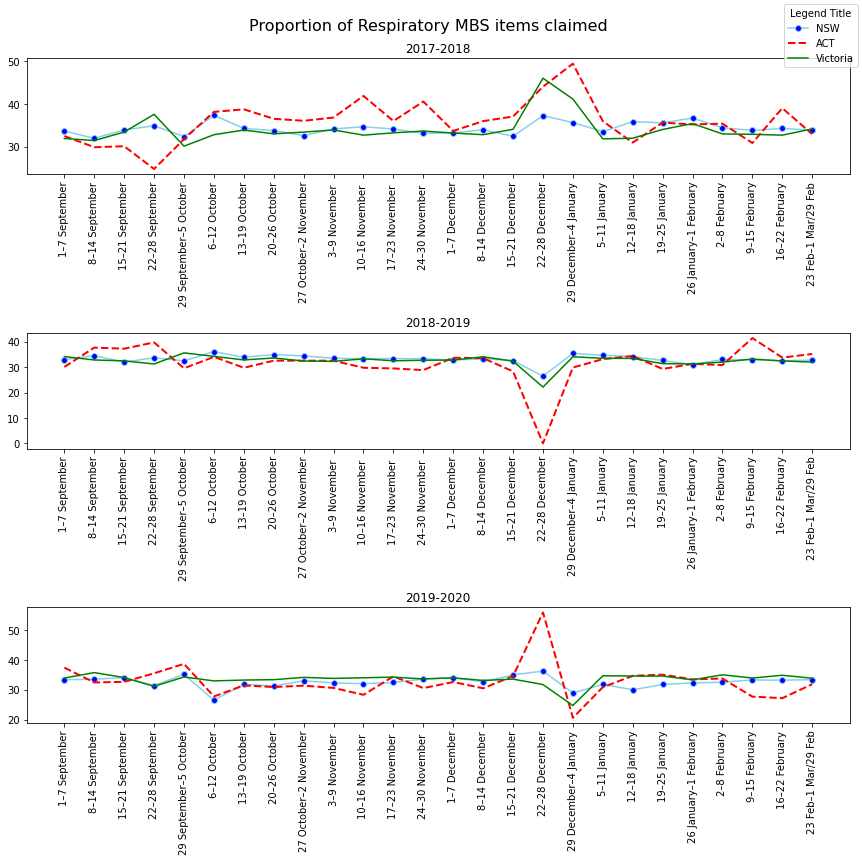

In [61]:

fig1 = plt.figure(figsize=(12,12))
fig1.suptitle('Proportion of Respiratory MBS items claimed', fontsize = 16)#,constrained_layout=True)
        #in the states\n NSW, ACT and Victoria\n for the months Sept.-Feb. in years 2017-2018, 2018-2019, 2019-2020\n\n')

ax = fig1.add_subplot(3, 1, 1)
#constrained_layout=True, sharey=True)
ax.plot('Week','no.respitemsprop20172018_nsw', data=df1_17prop18, marker='o', markerfacecolor='blue',  color='skyblue')
ax.plot( 'Week','no.respitemsprop20172018_act', data=df1_17prop18, marker='', color='red', linestyle='dashed',linewidth=2)
ax.plot( 'Week','no.respitemsprop20172018', data=df1_17prop18, marker='', color='green')
ax.set_title("\n\n2017-2018")
plt.xticks = [x for x in range(len(df1_17prop18['Week']))]
#plt.legend()
ax = plt.gca()
#figsize = [10, 25]

plt.draw()

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

ax = fig1.add_subplot(3, 1, 2)
ax.plot('Week','no.respitemsprop20182019_nsw', data=df1_18prop19 , marker='o', markerfacecolor='blue',  color='skyblue')
ax.plot( 'Week','no.respitemsprop20182019_act', data=df1_18prop19, marker='', color='red', linestyle='dashed',linewidth=2)
ax.plot( 'Week','no.respitemsprop20182019', data=df1_18prop19, marker='', color='green')
ax.set_title("2018-2019")
plt.xticks = [x for x in range(len(df1_18prop19['Week']))]
#plt.legend()
ax = plt.gca()
#figsize = [15, 20]

plt.draw()

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

ax = fig1.add_subplot(3, 1, 3)
ax.plot('Week','no.respitemsprop20192020_nsw', data=df1_19prop20, marker='o', markerfacecolor='blue',  color='skyblue')
ax.plot( 'Week','no.respitemsprop20192020_act', data=df1_19prop20, marker='', color='red', linestyle='dashed',linewidth=2)
ax.plot( 'Week','no.respitemsprop20192020', data=df1_19prop20, marker='', color='green')
ax.set_title("2019-2020")
plt.xticks = [x for x in range(len(df1_19prop20['Week']))]
#plt.legend()
ax = plt.gca()
#figsize = [15, 20]
line_labels = ['NSW', 'ACT', 'Victoria']
plt.draw()

for tick in ax.get_xticklabels():
    tick.set_rotation(90)
fig1.legend(
           labels=line_labels,   # The labels for each line
           #loc="top right",   # Position of legend
           #borderaxespad=0.1,    # Small spacing around legend box
           title="Legend Title"  # Title for the legend
           )

#fig.legend(title='Legend')

fig1.tight_layout()
fig1.savefig('plot2.png')


Intersetingly the same results if put together statewise, shows ACT has the rise in proportion rate w.r.t its total no. of respiratory MBS items claims

# Question:4

## Calculate the proportion of number of adrenergics and inhalers prescribed in the given regions in NSW for the year 2019-2020.

Lets start by looking at the nsw dataframe

In [62]:
nsw_inh_adr_df

,Week,State,Region code,Region,2017-2018,2018-2019,2019-2020
0,1–7 September,NSW,101.0,Capital Region,2259.63,2103.04,2088.65
1,8–14 September,NSW,101.0,Capital Region,2263.39,1959.11,2108.92
2,15–21 September,NSW,101.0,Capital Region,2226.29,2143.74,2150.13
3,22–28 September,NSW,101.0,Capital Region,2200.73,2106.46,2120.66
4,29 September–5 October,NSW,101.0,Capital Region,2035.35,1913.92,2160.67
...,...,...,...,...,...,...,...
723,26 January–1 February,NSW,128.0,Sydney - Sutherland,1199.00,1131.00,1239.00
724,2–8 February,NSW,128.0,Sydney - Sutherland,1283.00,1347.00,1346.00
725,9–15 February,NSW,128.0,Sydney - Sutherland,1371.00,1382.00,1277.00
726,16–22 February,NSW,128.0,Sydney - Sutherland,1367.00,1351.00,1351.00


In [63]:
nsw_inh_adr_df['Region'].unique()

<StringArray>
[                        'Capital Region',
                          'Central Coast',
                           'Central West',
                'Coffs Harbour - Grafton',
                     'Far West and Orana',
            'Hunter Valley exc Newcastle',
                              'Illawarra',
                        'Mid North Coast',
                                 'Murray',
             'New England and North West',
           'Newcastle and Lake Macquarie',
                       'Richmond - Tweed',
                               'Riverina',
      'Southern Highlands and Shoalhaven',
 'Sydney - Baulkham Hills and Hawkesbury',
                     'Sydney - Blacktown',
          'Sydney - City and Inner South',
               'Sydney - Eastern Suburbs',
              'Sydney - Inner South West',
                    'Sydney - Inner West',
      'Sydney - North Sydney and Hornsby',
              'Sydney - Northern Beaches',
              'Sydney - Outer South West

As this dataframe is exclusively  for the state NSW, we shall remove the column State

In [64]:
nsw_inh_adr_df
del nsw_inh_adr_df['State']
nsw_inh_adr_df

,Week,Region code,Region,2017-2018,2018-2019,2019-2020
0,1–7 September,101.0,Capital Region,2259.63,2103.04,2088.65
1,8–14 September,101.0,Capital Region,2263.39,1959.11,2108.92
2,15–21 September,101.0,Capital Region,2226.29,2143.74,2150.13
3,22–28 September,101.0,Capital Region,2200.73,2106.46,2120.66
4,29 September–5 October,101.0,Capital Region,2035.35,1913.92,2160.67
...,...,...,...,...,...,...
723,26 January–1 February,128.0,Sydney - Sutherland,1199.00,1131.00,1239.00
724,2–8 February,128.0,Sydney - Sutherland,1283.00,1347.00,1346.00
725,9–15 February,128.0,Sydney - Sutherland,1371.00,1382.00,1277.00
726,16–22 February,128.0,Sydney - Sutherland,1367.00,1351.00,1351.00


In [65]:
nsw_inh_adr_df['Region']=nsw_inh_adr_df['Region'].replace('Capital Region', 'CapitalRegion') 

In [66]:
#Making Groups w.r.t regions and making a list of the name of them
grouped = nsw_inh_adr_df.groupby(['Region'])
#grouped
list_region = list(nsw_inh_adr_df.groupby(['Region']).groups.keys())
list_region

['CapitalRegion',
 'Central Coast',
 'Central West',
 'Coffs Harbour - Grafton',
 'Far West and Orana',
 'Hunter Valley exc Newcastle',
 'Illawarra',
 'Mid North Coast',
 'Murray',
 'New England and North West',
 'Newcastle and Lake Macquarie',
 'Richmond - Tweed',
 'Riverina',
 'Southern Highlands and Shoalhaven',
 'Sydney - Baulkham Hills and Hawkesbury',
 'Sydney - Blacktown',
 'Sydney - City and Inner South',
 'Sydney - Eastern Suburbs',
 'Sydney - Inner South West',
 'Sydney - Inner West',
 'Sydney - North Sydney and Hornsby',
 'Sydney - Northern Beaches',
 'Sydney - Outer South West',
 'Sydney - Outer West and Blue Mountains',
 'Sydney - Parramatta',
 'Sydney - Ryde',
 'Sydney - South West',
 'Sydney - Sutherland']

In [67]:
nsw_inh_adr_df['Region'].nunique()

28

The no. of regions covered in this data for state NSW is 28.


Merging all the groups w.r.t unique regions in the state NSW on the column 'Week'.

In [68]:
i = 0
for name, group in grouped:
        Region1 = grouped.get_group(name)
        if i == 0:
            Region2 = Region1.copy()
        if i > 0:
            Region2 = Region2.merge(Region1, on = 'Week', how = 'inner', suffixes =('',f'-{name}'))      
        i += 1
        

Lets have a look at the dataframe Region2

In [69]:
Region2.head()

,Week,Region code,Region,2017-2018,2018-2019,2019-2020,Region code-Central Coast,Region-Central Coast,2017-2018-Central Coast,2018-2019-Central Coast,...,Region code-Sydney - South West,Region-Sydney - South West,2017-2018-Sydney - South West,2018-2019-Sydney - South West,2019-2020-Sydney - South West,Region code-Sydney - Sutherland,Region-Sydney - Sutherland,2017-2018-Sydney - Sutherland,2018-2019-Sydney - Sutherland,2019-2020-Sydney - Sutherland
0,1–7 September,101.0,CapitalRegion,2259.63,2103.04,2088.65,102.0,Central Coast,4021.16,3857.95,...,127.0,Sydney - South West,4104.00,3762.41,3737.79,128.0,Sydney - Sutherland,1729.0,1557.0,1586.0
1,8–14 September,101.0,CapitalRegion,2263.39,1959.11,2108.92,102.0,Central Coast,3916.25,3643.38,...,127.0,Sydney - South West,3964.76,3730.25,3775.12,128.0,Sydney - Sutherland,1591.0,1519.0,1566.0
2,15–21 September,101.0,CapitalRegion,2226.29,2143.74,2150.13,102.0,Central Coast,4085.90,3693.99,...,127.0,Sydney - South West,3768.34,3642.04,3572.71,128.0,Sydney - Sutherland,1658.0,1641.0,1476.0
3,22–28 September,101.0,CapitalRegion,2200.73,2106.46,2120.66,102.0,Central Coast,3813.42,3846.12,...,127.0,Sydney - South West,3797.47,3763.12,3686.73,128.0,Sydney - Sutherland,1650.0,1560.0,1568.0
4,29 September–5 October,101.0,CapitalRegion,2035.35,1913.92,2160.67,102.0,Central Coast,3537.94,3590.36,...,127.0,Sydney - South West,3600.54,3222.44,3599.74,128.0,Sydney - Sutherland,1454.0,1397.0,1634.0


In [70]:
#renaming the column
Region2.rename(columns={'2019-2020':'2019-2020-CapitalRegion'}, inplace = True)
lst1 = list_region.copy()
lst2=['Week']
year= '2019-2020-'
for element in lst1:
      lst2.append(year + element) 
      
lst2


['Week',
 '2019-2020-CapitalRegion',
 '2019-2020-Central Coast',
 '2019-2020-Central West',
 '2019-2020-Coffs Harbour - Grafton',
 '2019-2020-Far West and Orana',
 '2019-2020-Hunter Valley exc Newcastle',
 '2019-2020-Illawarra',
 '2019-2020-Mid North Coast',
 '2019-2020-Murray',
 '2019-2020-New England and North West',
 '2019-2020-Newcastle and Lake Macquarie',
 '2019-2020-Richmond - Tweed',
 '2019-2020-Riverina',
 '2019-2020-Southern Highlands and Shoalhaven',
 '2019-2020-Sydney - Baulkham Hills and Hawkesbury',
 '2019-2020-Sydney - Blacktown',
 '2019-2020-Sydney - City and Inner South',
 '2019-2020-Sydney - Eastern Suburbs',
 '2019-2020-Sydney - Inner South West',
 '2019-2020-Sydney - Inner West',
 '2019-2020-Sydney - North Sydney and Hornsby',
 '2019-2020-Sydney - Northern Beaches',
 '2019-2020-Sydney - Outer South West',
 '2019-2020-Sydney - Outer West and Blue Mountains',
 '2019-2020-Sydney - Parramatta',
 '2019-2020-Sydney - Ryde',
 '2019-2020-Sydney - South West',
 '2019-2020-Sy

In [71]:
inhnsw_20192020_df = Region2[lst2].copy()
inhnsw_20192020_df

,Week,2019-2020-CapitalRegion,2019-2020-Central Coast,2019-2020-Central West,2019-2020-Coffs Harbour - Grafton,2019-2020-Far West and Orana,2019-2020-Hunter Valley exc Newcastle,2019-2020-Illawarra,2019-2020-Mid North Coast,2019-2020-Murray,...,2019-2020-Sydney - Inner South West,2019-2020-Sydney - Inner West,2019-2020-Sydney - North Sydney and Hornsby,2019-2020-Sydney - Northern Beaches,2019-2020-Sydney - Outer South West,2019-2020-Sydney - Outer West and Blue Mountains,2019-2020-Sydney - Parramatta,2019-2020-Sydney - Ryde,2019-2020-Sydney - South West,2019-2020-Sydney - Sutherland
0,1–7 September,2088.65,3733.86,2234.41,1476.39,1493.85,2572.86,2791.54,2663.67,1238.51,...,5247.27,1704.62,2061.92,1502.0,2389.27,2647.59,3346.65,963.05,3737.79,1586.0
1,8–14 September,2108.92,3680.25,2155.72,1582.15,1372.45,2678.14,2797.50,2742.33,1162.45,...,5863.16,1848.09,2103.16,1459.0,2489.09,2751.74,3504.95,994.25,3775.12,1566.0
2,15–21 September,2150.13,3560.05,2192.49,1582.71,1453.17,2502.65,2839.55,2650.32,1243.17,...,5315.75,1530.80,2038.08,1502.0,2300.08,2766.92,3371.52,953.85,3572.71,1476.0
3,22–28 September,2120.66,3599.75,2141.53,1364.39,1418.22,2555.31,2913.61,2552.17,1172.41,...,5569.99,1752.76,2117.42,1500.0,2315.97,2717.56,3308.31,997.50,3686.73,1568.0
4,29 September–5 October,2160.67,3460.08,2116.61,1540.70,1379.16,2707.07,2855.58,2592.76,1248.89,...,5705.66,1725.36,2095.91,1438.0,2487.19,2721.47,3431.39,939.51,3599.74,1634.0
5,6–12 October,1977.25,3324.66,1898.14,1305.73,1266.73,2463.78,2681.53,2500.95,1109.55,...,5133.75,1508.21,1944.57,1316.0,2109.63,2513.75,3196.69,849.24,3437.63,1469.0
6,13–19 October,2075.41,3674.62,2124.61,1531.71,1412.94,2689.51,2877.50,2564.57,1193.22,...,5420.93,1669.02,2091.23,1473.0,2280.45,2648.06,3520.82,962.66,3820.48,1478.0
7,20–26 October,2169.91,3423.12,2169.72,1361.11,1341.67,2442.07,2782.53,2620.16,1233.48,...,5537.65,1787.55,2009.48,1384.0,2247.65,2788.81,3459.84,949.97,3658.76,1502.0
8,27 October–2 November,2099.66,3774.36,2140.21,1486.16,1380.07,2722.88,2947.61,2975.62,1324.79,...,5647.12,1710.25,2209.59,1512.0,2305.39,2740.00,3643.44,1029.97,3890.76,1721.0
9,3–9 November,2030.58,3536.86,2179.77,1531.40,1414.57,2703.75,2814.50,2879.02,1227.49,...,5879.91,1745.78,2156.53,1489.0,2353.54,2741.31,3422.19,953.49,3616.98,1683.0


In [72]:
list3 = lst2.copy()
list3.remove('Week')

list3
inh_nsw_20192020_df = Region2[list3].copy()
sum1 = inh_nsw_20192020_df.sum(axis = 0)
sum1
sum_inh_nsw_20192020_df = sum1.to_frame()
sum_inh_nsw_20192020_df
#list3
sum2 = sum_inh_nsw_20192020_df.sum(axis = 0)
sum_inh_nsw_20192020_df = sum_inh_nsw_20192020_df/sum2*100
sum_inh_nsw_20192020_df
#list3
#sum_inh_nsw_20192020_df[0] = sum_inh_nsw_20192020_df[0].astype(float)
#print(sum2)
#sum_inh_nsw_20192020_df

,0
2019-2020-CapitalRegion,3.357812
2019-2020-Central Coast,5.569912
2019-2020-Central West,3.335505
2019-2020-Coffs Harbour - Grafton,2.249490
2019-2020-Far West and Orana,2.092072
2019-2020-Hunter Valley exc Newcastle,3.989535
2019-2020-Illawarra,4.394302
2019-2020-Mid North Coast,4.135837
2019-2020-Murray,1.824608
2019-2020-New England and North West,3.024912


In [73]:

#sum1 = inh_nsw_20192020_df.sum(axis = 0) 
#list3 = lst2.copy()
#list3.remove('Week')
#list3
#sum_inh_nsw_20192020_df = sum1.to_frame()
#sum_inh_nsw_20192020_df = sum_inh_nsw_20192020_df.astype(float)
#sum2 = sum_inh_nsw_20192020_df.sum(axis = 0)
#sum_inh_nsw_20192020_df = sum_inh_nsw_20192020_df/sum2*100
#sum_inh_nsw_20192020_df
#sum_inh_nsw_20192020_df[0]
#sum_inh_nsw_20192020_df = sum_inh_nsw_20192020_df[0]
#sum_inh_nsw_20192020_df.to_frame()
#sum_inh_nsw_20192020_df.values
#sum_inh_nsw_20192020_df = sum_inh_victoria_20192020_df[0]
#sum_inh_nsw_20192020_df.to_frame()
#sum_inh_nsw_20192020_df.values

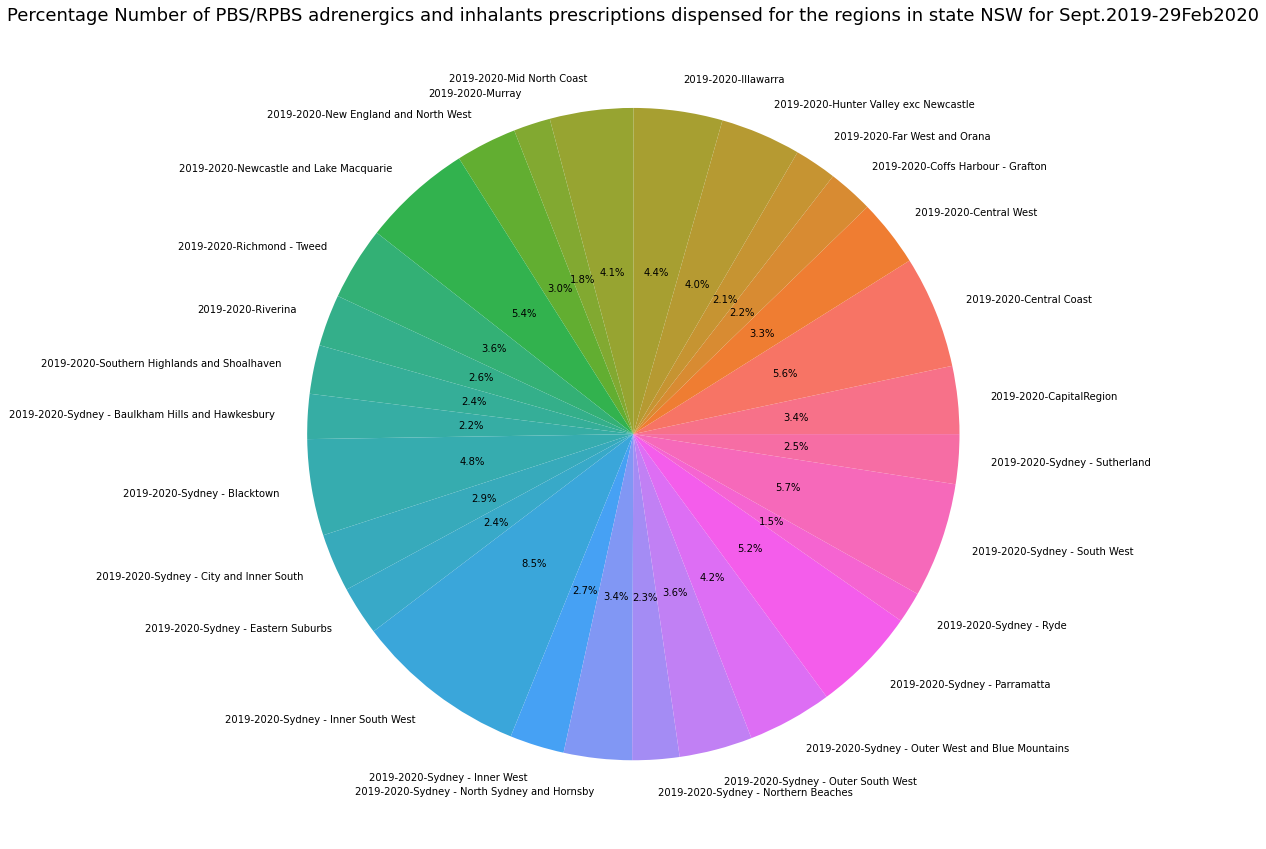

In [74]:
# Constructing  a pie chart
data = sum_inh_nsw_20192020_df[0]
labels = sum_inh_nsw_20192020_df.index
#define Seaborn color palette to use
sns.reset_orig()  
NUM_COLORS = len(data)
colors = sns.color_palette('husl',n_colors = NUM_COLORS)#[0:len(data)]
#create pie chart
pie, ax = plt.subplots(figsize=[15,15])
plt.pie(x=data, autopct="%.1f%%",colors = colors, labels=labels, pctdistance=0.5)
plt.title("Percentage Number of PBS/RPBS adrenergics and inhalants prescriptions dispensed for the regions in state NSW for Sept.2019-29Feb2020", fontsize=18);
pie.savefig("%no.NSWregionsadrninhalants.png")

## Question 5

Find the region in state Victoria in which the proportion of number of adrenergics and inhalers were  prescribed the most for the year 2019-2020.


## Solution:

Consider the dataframe of the state Victoria 

In [75]:
victoria_inh_adr_df.head()

,Week,State,Region code,Region,2017-2018,2018-2019,2019-2020
0,1–7 September,Victoria,201.0,Ballarat,1820.58,1713.95,1745.81
1,8–14 September,Victoria,201.0,Ballarat,1823.89,1648.15,1689.52
2,15–21 September,Victoria,201.0,Ballarat,1820.73,1634.92,1587.33
3,22–28 September,Victoria,201.0,Ballarat,1844.76,1379.32,1472.09
4,29 September–5 October,Victoria,201.0,Ballarat,1511.99,1752.16,1692.44


In [76]:
#remove the column 'State'
del victoria_inh_adr_df['State']
victoria_inh_adr_df

,Week,Region code,Region,2017-2018,2018-2019,2019-2020
0,1–7 September,201.0,Ballarat,1820.58,1713.95,1745.81
1,8–14 September,201.0,Ballarat,1823.89,1648.15,1689.52
2,15–21 September,201.0,Ballarat,1820.73,1634.92,1587.33
3,22–28 September,201.0,Ballarat,1844.76,1379.32,1472.09
4,29 September–5 October,201.0,Ballarat,1511.99,1752.16,1692.44
...,...,...,...,...,...,...
437,26 January–1 February,217.0,Warrnambool and South West,951.86,1081.02,1023.03
438,2–8 February,217.0,Warrnambool and South West,1107.15,1089.64,1197.99
439,9–15 February,217.0,Warrnambool and South West,1063.60,1115.34,1089.91
440,16–22 February,217.0,Warrnambool and South West,1122.50,1157.69,1076.97


In [77]:
victoria_inh_adr_df['Region'].unique()

<StringArray>
[                  'Ballarat',                    'Bendigo',
                    'Geelong',                       'Hume',
        'Latrobe - Gippsland',          'Melbourne - Inner',
     'Melbourne - Inner East',    'Melbourne - Inner South',
     'Melbourne - North East',     'Melbourne - North West',
     'Melbourne - Outer East',     'Melbourne - South East',
           'Melbourne - West',       'Mornington Peninsula',
                 'North West',                 'Shepparton',
 'Warrnambool and South West']
Length: 17, dtype: string

In [78]:
victoria_inh_adr_df['Region'].nunique()

17

In [79]:
grouped1 = victoria_inh_adr_df.groupby(['Region'])
lst_region_victoria = list(victoria_inh_adr_df.groupby(['Region']).groups.keys())
lst_region_victoria

['Ballarat',
 'Bendigo',
 'Geelong',
 'Hume',
 'Latrobe - Gippsland',
 'Melbourne - Inner',
 'Melbourne - Inner East',
 'Melbourne - Inner South',
 'Melbourne - North East',
 'Melbourne - North West',
 'Melbourne - Outer East',
 'Melbourne - South East',
 'Melbourne - West',
 'Mornington Peninsula',
 'North West',
 'Shepparton',
 'Warrnambool and South West']

In [80]:
i = 0
for name, group in grouped1:
        Region_v1_df = grouped1.get_group(name)
        if i == 0:
            Region_v2_df = Region_v1_df.copy()
        if i > 0:
            Region_v2_df = Region_v2_df.merge(Region_v1_df, on = 'Week', how = 'inner', suffixes =('',f'-{name}'))      
        i += 1


Lets have a look at Region_v2_df

In [81]:
Region_v2_df.head()

,Week,Region code,Region,2017-2018,2018-2019,2019-2020,Region code-Bendigo,Region-Bendigo,2017-2018-Bendigo,2018-2019-Bendigo,...,Region code-Shepparton,Region-Shepparton,2017-2018-Shepparton,2018-2019-Shepparton,2019-2020-Shepparton,Region code-Warrnambool and South West,Region-Warrnambool and South West,2017-2018-Warrnambool and South West,2018-2019-Warrnambool and South West,2019-2020-Warrnambool and South West
0,1–7 September,201.0,Ballarat,1820.58,1713.95,1745.81,202.0,Bendigo,1588.16,1438.33,...,216.0,Shepparton,1491.35,1431.65,1348.71,217.0,Warrnambool and South West,1469.15,1339.27,1240.47
1,8–14 September,201.0,Ballarat,1823.89,1648.15,1689.52,202.0,Bendigo,1557.30,1463.69,...,216.0,Shepparton,1468.12,1412.32,1317.80,217.0,Warrnambool and South West,1360.43,1262.91,1211.32
2,15–21 September,201.0,Ballarat,1820.73,1634.92,1587.33,202.0,Bendigo,1511.47,1352.79,...,216.0,Shepparton,1528.65,1354.07,1353.50,217.0,Warrnambool and South West,1340.55,1231.78,1281.03
3,22–28 September,201.0,Ballarat,1844.76,1379.32,1472.09,202.0,Bendigo,1524.09,1185.23,...,216.0,Shepparton,1465.66,1236.80,1214.51,217.0,Warrnambool and South West,1383.67,1158.76,1232.10
4,29 September–5 October,201.0,Ballarat,1511.99,1752.16,1692.44,202.0,Bendigo,1491.20,1513.16,...,216.0,Shepparton,1303.10,1492.35,1347.11,217.0,Warrnambool and South West,1212.16,1372.25,1285.67


In [82]:
#renaming the column
Region_v2_df.rename(columns={'2019-2020':'2019-2020-Ballarat'}, inplace = True)
lst_vic1 = lst_region_victoria.copy()
lst_vic2=['Week']
year= '2019-2020-'
for element in lst_vic1:
      lst_vic2.append(year + element) 
      
lst_vic2


['Week',
 '2019-2020-Ballarat',
 '2019-2020-Bendigo',
 '2019-2020-Geelong',
 '2019-2020-Hume',
 '2019-2020-Latrobe - Gippsland',
 '2019-2020-Melbourne - Inner',
 '2019-2020-Melbourne - Inner East',
 '2019-2020-Melbourne - Inner South',
 '2019-2020-Melbourne - North East',
 '2019-2020-Melbourne - North West',
 '2019-2020-Melbourne - Outer East',
 '2019-2020-Melbourne - South East',
 '2019-2020-Melbourne - West',
 '2019-2020-Mornington Peninsula',
 '2019-2020-North West',
 '2019-2020-Shepparton',
 '2019-2020-Warrnambool and South West']

Looking at the dataframe having all given Victoria regions year 2019-2020 data 

In [83]:
inhvictoria_20192020_df = Region_v2_df[lst_vic2].copy()
inhvictoria_20192020_df.head()

,Week,2019-2020-Ballarat,2019-2020-Bendigo,2019-2020-Geelong,2019-2020-Hume,2019-2020-Latrobe - Gippsland,2019-2020-Melbourne - Inner,2019-2020-Melbourne - Inner East,2019-2020-Melbourne - Inner South,2019-2020-Melbourne - North East,2019-2020-Melbourne - North West,2019-2020-Melbourne - Outer East,2019-2020-Melbourne - South East,2019-2020-Melbourne - West,2019-2020-Mornington Peninsula,2019-2020-North West,2019-2020-Shepparton,2019-2020-Warrnambool and South West
0,1–7 September,1745.81,1451.72,2756.76,1630.31,2743.96,2995.05,2020.66,2620.76,3492.49,2858.87,3768.39,5596.04,5320.87,2817.43,1802.99,1348.71,1240.47
1,8–14 September,1689.52,1309.12,2660.28,1596.56,2904.28,3230.59,2079.24,2575.45,3427.89,2959.47,3939.86,5712.30,5114.48,2811.97,1744.35,1317.80,1211.32
2,15–21 September,1587.33,1422.35,2586.15,1611.48,2758.19,3109.00,2103.54,2602.98,3470.16,2900.38,3963.90,5626.98,5253.96,2714.67,1751.10,1353.50,1281.03
3,22–28 September,1472.09,1215.12,2498.52,1510.72,2628.07,2838.97,1983.06,2455.31,3205.48,2729.16,3670.00,5252.03,4796.03,2533.48,1624.45,1214.51,1232.10
4,29 September–5 October,1692.44,1456.26,2739.43,1692.56,2853.33,3206.12,2181.28,2865.93,3551.57,2966.82,4064.05,5891.16,5349.03,2886.48,1856.05,1347.11,1285.67


In [84]:

#list3 = lst2.copy()
#list3.remove('Week')

#list3
#inh_nsw_20192020_df = Region2[list3].copy()
#sum_vic1 = inh_victoria_20192020_df.sum(axis = 0) 
lst_vic3 = lst_vic2.copy()
lst_vic3.remove('Week')
inh_victoria_20192020_df = Region_v2_df[lst_vic3].copy()
sum_vic1 = inh_victoria_20192020_df.sum(axis = 0) 
sum_inh_victoria_20192020_df = sum_vic1.to_frame()
sum_vic2 = sum_inh_victoria_20192020_df.sum(axis = 0)
sum_inh_victoria_20192020_df = sum_inh_victoria_20192020_df/sum_vic2*100
sum_inh_victoria_20192020_df
sum_inh_victoria_20192020_df = sum_inh_victoria_20192020_df[0]
sum_inh_victoria_20192020_df.to_frame()
sum_inh_victoria_20192020_df.values


array([ 3.47329777,  2.87291645,  5.73993122,  3.46770194,  6.01952167,
        6.74307725,  4.5810087 ,  5.84048308,  7.35099581,  6.42507028,
        8.54756488, 12.30641414, 11.38484047,  6.02690639,  3.71183619,
        2.79779562,  2.71063814])

The region in state Victoria in which the proportion of number of adrenergics and inhalers were  prescribed the most for the year 2019-2020 is

In [85]:
sum_inh_victoria_20192020_df.idxmax()


'2019-2020-Melbourne - South East'

In [86]:
#the max. value is :
sum_inh_victoria_20192020_df.values.max()


12.306414139114228

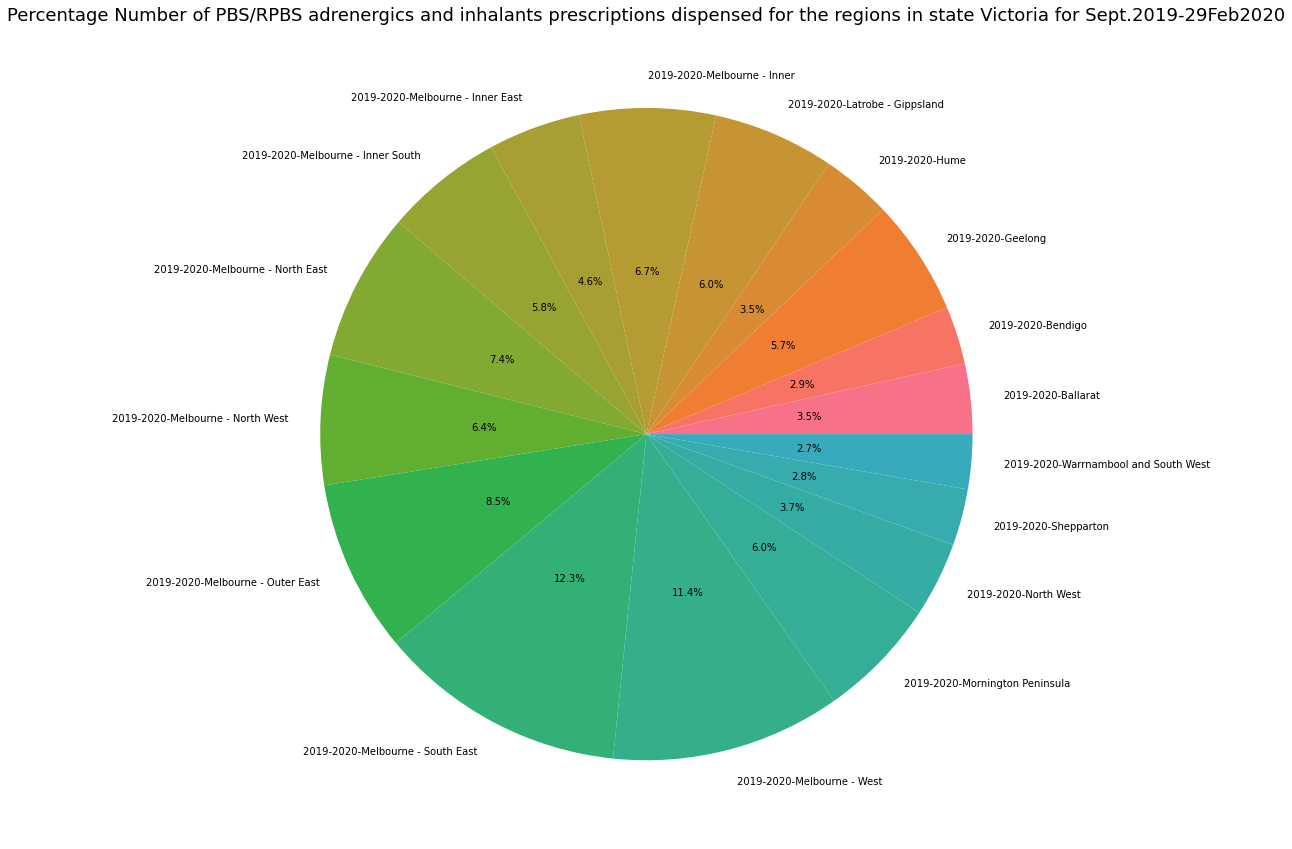

In [87]:
# Constructing  a pie chart
data1 = sum_inh_victoria_20192020_df
labels = sum_inh_victoria_20192020_df.index
#define Seaborn color palette to use
NUM_COLORS = len(data)#20

sns.reset_orig()  
colors = sns.color_palette('husl',n_colors = NUM_COLORS)#[0:len(data)]
#create pie chart
pie, ax = plt.subplots(figsize=[15,15])
plt.pie(x=data1, autopct="%.1f%%",colors = colors, labels=labels, pctdistance=0.5)
plt.title("Percentage Number of PBS/RPBS adrenergics and inhalants prescriptions dispensed for the regions in state Victoria for Sept.2019-29Feb2020", fontsize=18);
pie.savefig("%no.Victoriaregionsadrninhalants.png")

# Question: 6

Show the correlation if any between the number of repiratory MBS items claimed and number of adregenics and inhalers prescribed for the year 2019-2020 for the three states NSW, Canberra and ACT.


## Solution:

We shall first make the data frame for the state ACT w.r.t all its regions for the year 2019-2020 for the number of adregenics and inhalers prescribed for the year 2019-2020.

In [88]:
act_inh_adr_df.head()

,Week,State,Region code,Region,2017-2018,2018-2019,2019-2020
0,1–7 September,ACT,801.0,Australian Capital Territory,2555.96,2390.45,2403.08
1,8–14 September,ACT,801.0,Australian Capital Territory,2602.07,2334.91,2599.24
2,15–21 September,ACT,801.0,Australian Capital Territory,2468.12,2416.20,2443.88
3,22–28 September,ACT,801.0,Australian Capital Territory,2391.48,2397.07,2424.75
4,29 September–5 October,ACT,801.0,Australian Capital Territory,2257.91,2193.86,2460.14


In [89]:
del act_inh_adr_df['State']
act_inh_adr_df['Region'].unique()

<StringArray>
['Australian Capital Territory']
Length: 1, dtype: string

In [90]:
inhadr_act_20192020_df = act_inh_adr_df[['Week', '2019-2020']].copy()
inhadr_act_20192020_df = inhadr_act_20192020_df.rename(columns={'2019-2020':'2019-2020_act_inh'})
inhadr_act_20192020_df

,Week,2019-2020_act_inh
0,1–7 September,2403.08
1,8–14 September,2599.24
2,15–21 September,2443.88
3,22–28 September,2424.75
4,29 September–5 October,2460.14
5,6–12 October,2097.06
6,13–19 October,2473.06
7,20–26 October,2410.60
8,27 October–2 November,2540.33
9,3–9 November,2452.96


We shall now sum up all the regions of the states NSW and Victoria to get the required dataframes to merge later

In [91]:
inh_nsw_20192020_df.head()

,2019-2020-CapitalRegion,2019-2020-Central Coast,2019-2020-Central West,2019-2020-Coffs Harbour - Grafton,2019-2020-Far West and Orana,2019-2020-Hunter Valley exc Newcastle,2019-2020-Illawarra,2019-2020-Mid North Coast,2019-2020-Murray,2019-2020-New England and North West,...,2019-2020-Sydney - Inner South West,2019-2020-Sydney - Inner West,2019-2020-Sydney - North Sydney and Hornsby,2019-2020-Sydney - Northern Beaches,2019-2020-Sydney - Outer South West,2019-2020-Sydney - Outer West and Blue Mountains,2019-2020-Sydney - Parramatta,2019-2020-Sydney - Ryde,2019-2020-Sydney - South West,2019-2020-Sydney - Sutherland
0,2088.65,3733.86,2234.41,1476.39,1493.85,2572.86,2791.54,2663.67,1238.51,2029.29,...,5247.27,1704.62,2061.92,1502.0,2389.27,2647.59,3346.65,963.05,3737.79,1586.0
1,2108.92,3680.25,2155.72,1582.15,1372.45,2678.14,2797.50,2742.33,1162.45,2086.02,...,5863.16,1848.09,2103.16,1459.0,2489.09,2751.74,3504.95,994.25,3775.12,1566.0
2,2150.13,3560.05,2192.49,1582.71,1453.17,2502.65,2839.55,2650.32,1243.17,2009.44,...,5315.75,1530.80,2038.08,1502.0,2300.08,2766.92,3371.52,953.85,3572.71,1476.0
3,2120.66,3599.75,2141.53,1364.39,1418.22,2555.31,2913.61,2552.17,1172.41,2026.42,...,5569.99,1752.76,2117.42,1500.0,2315.97,2717.56,3308.31,997.50,3686.73,1568.0
4,2160.67,3460.08,2116.61,1540.70,1379.16,2707.07,2855.58,2592.76,1248.89,2109.75,...,5705.66,1725.36,2095.91,1438.0,2487.19,2721.47,3431.39,939.51,3599.74,1634.0


In [92]:
nsw_inh_adr_df

,Week,Region code,Region,2017-2018,2018-2019,2019-2020
0,1–7 September,101.0,CapitalRegion,2259.63,2103.04,2088.65
1,8–14 September,101.0,CapitalRegion,2263.39,1959.11,2108.92
2,15–21 September,101.0,CapitalRegion,2226.29,2143.74,2150.13
3,22–28 September,101.0,CapitalRegion,2200.73,2106.46,2120.66
4,29 September–5 October,101.0,CapitalRegion,2035.35,1913.92,2160.67
...,...,...,...,...,...,...
723,26 January–1 February,128.0,Sydney - Sutherland,1199.00,1131.00,1239.00
724,2–8 February,128.0,Sydney - Sutherland,1283.00,1347.00,1346.00
725,9–15 February,128.0,Sydney - Sutherland,1371.00,1382.00,1277.00
726,16–22 February,128.0,Sydney - Sutherland,1367.00,1351.00,1351.00


In [93]:
nsw_inh_adr_df.set_index('Week')

,Region code,Region,2017-2018,2018-2019,2019-2020
Week,,,,,
1–7 September,101.0,CapitalRegion,2259.63,2103.04,2088.65
8–14 September,101.0,CapitalRegion,2263.39,1959.11,2108.92
15–21 September,101.0,CapitalRegion,2226.29,2143.74,2150.13
22–28 September,101.0,CapitalRegion,2200.73,2106.46,2120.66
29 September–5 October,101.0,CapitalRegion,2035.35,1913.92,2160.67
...,...,...,...,...,...
26 January–1 February,128.0,Sydney - Sutherland,1199.00,1131.00,1239.00
2–8 February,128.0,Sydney - Sutherland,1283.00,1347.00,1346.00
9–15 February,128.0,Sydney - Sutherland,1371.00,1382.00,1277.00


In [94]:
inhnsw_20192020_df.set_index('Week')

,2019-2020-CapitalRegion,2019-2020-Central Coast,2019-2020-Central West,2019-2020-Coffs Harbour - Grafton,2019-2020-Far West and Orana,2019-2020-Hunter Valley exc Newcastle,2019-2020-Illawarra,2019-2020-Mid North Coast,2019-2020-Murray,2019-2020-New England and North West,...,2019-2020-Sydney - Inner South West,2019-2020-Sydney - Inner West,2019-2020-Sydney - North Sydney and Hornsby,2019-2020-Sydney - Northern Beaches,2019-2020-Sydney - Outer South West,2019-2020-Sydney - Outer West and Blue Mountains,2019-2020-Sydney - Parramatta,2019-2020-Sydney - Ryde,2019-2020-Sydney - South West,2019-2020-Sydney - Sutherland
Week,,,,,,,,,,,,,,,,,,,,,
1–7 September,2088.65,3733.86,2234.41,1476.39,1493.85,2572.86,2791.54,2663.67,1238.51,2029.29,...,5247.27,1704.62,2061.92,1502.0,2389.27,2647.59,3346.65,963.05,3737.79,1586.0
8–14 September,2108.92,3680.25,2155.72,1582.15,1372.45,2678.14,2797.50,2742.33,1162.45,2086.02,...,5863.16,1848.09,2103.16,1459.0,2489.09,2751.74,3504.95,994.25,3775.12,1566.0
15–21 September,2150.13,3560.05,2192.49,1582.71,1453.17,2502.65,2839.55,2650.32,1243.17,2009.44,...,5315.75,1530.80,2038.08,1502.0,2300.08,2766.92,3371.52,953.85,3572.71,1476.0
22–28 September,2120.66,3599.75,2141.53,1364.39,1418.22,2555.31,2913.61,2552.17,1172.41,2026.42,...,5569.99,1752.76,2117.42,1500.0,2315.97,2717.56,3308.31,997.50,3686.73,1568.0
29 September–5 October,2160.67,3460.08,2116.61,1540.70,1379.16,2707.07,2855.58,2592.76,1248.89,2109.75,...,5705.66,1725.36,2095.91,1438.0,2487.19,2721.47,3431.39,939.51,3599.74,1634.0
6–12 October,1977.25,3324.66,1898.14,1305.73,1266.73,2463.78,2681.53,2500.95,1109.55,1794.38,...,5133.75,1508.21,1944.57,1316.0,2109.63,2513.75,3196.69,849.24,3437.63,1469.0
13–19 October,2075.41,3674.62,2124.61,1531.71,1412.94,2689.51,2877.50,2564.57,1193.22,1912.91,...,5420.93,1669.02,2091.23,1473.0,2280.45,2648.06,3520.82,962.66,3820.48,1478.0
20–26 October,2169.91,3423.12,2169.72,1361.11,1341.67,2442.07,2782.53,2620.16,1233.48,1897.61,...,5537.65,1787.55,2009.48,1384.0,2247.65,2788.81,3459.84,949.97,3658.76,1502.0
27 October–2 November,2099.66,3774.36,2140.21,1486.16,1380.07,2722.88,2947.61,2975.62,1324.79,2147.53,...,5647.12,1710.25,2209.59,1512.0,2305.39,2740.00,3643.44,1029.97,3890.76,1721.0


In [95]:
inhnsw_20192020_df['2019-2020_nsw_inh'] = inhnsw_20192020_df.sum(axis = 1)

In [96]:
inhnsw_20192020_df.head()#.info()

,Week,2019-2020-CapitalRegion,2019-2020-Central Coast,2019-2020-Central West,2019-2020-Coffs Harbour - Grafton,2019-2020-Far West and Orana,2019-2020-Hunter Valley exc Newcastle,2019-2020-Illawarra,2019-2020-Mid North Coast,2019-2020-Murray,...,2019-2020-Sydney - Inner West,2019-2020-Sydney - North Sydney and Hornsby,2019-2020-Sydney - Northern Beaches,2019-2020-Sydney - Outer South West,2019-2020-Sydney - Outer West and Blue Mountains,2019-2020-Sydney - Parramatta,2019-2020-Sydney - Ryde,2019-2020-Sydney - South West,2019-2020-Sydney - Sutherland,2019-2020_nsw_inh
0,1–7 September,2088.65,3733.86,2234.41,1476.39,1493.85,2572.86,2791.54,2663.67,1238.51,...,1704.62,2061.92,1502.0,2389.27,2647.59,3346.65,963.05,3737.79,1586.0,64744.02
1,8–14 September,2108.92,3680.25,2155.72,1582.15,1372.45,2678.14,2797.50,2742.33,1162.45,...,1848.09,2103.16,1459.0,2489.09,2751.74,3504.95,994.25,3775.12,1566.0,66031.51
2,15–21 September,2150.13,3560.05,2192.49,1582.71,1453.17,2502.65,2839.55,2650.32,1243.17,...,1530.80,2038.08,1502.0,2300.08,2766.92,3371.52,953.85,3572.71,1476.0,64181.43
3,22–28 September,2120.66,3599.75,2141.53,1364.39,1418.22,2555.31,2913.61,2552.17,1172.41,...,1752.76,2117.42,1500.0,2315.97,2717.56,3308.31,997.50,3686.73,1568.0,64767.74
4,29 September–5 October,2160.67,3460.08,2116.61,1540.70,1379.16,2707.07,2855.58,2592.76,1248.89,...,1725.36,2095.91,1438.0,2487.19,2721.47,3431.39,939.51,3599.74,1634.0,64808.82


In [97]:
inhnsw_20192020_df.reset_index(drop = True)

,Week,2019-2020-CapitalRegion,2019-2020-Central Coast,2019-2020-Central West,2019-2020-Coffs Harbour - Grafton,2019-2020-Far West and Orana,2019-2020-Hunter Valley exc Newcastle,2019-2020-Illawarra,2019-2020-Mid North Coast,2019-2020-Murray,...,2019-2020-Sydney - Inner West,2019-2020-Sydney - North Sydney and Hornsby,2019-2020-Sydney - Northern Beaches,2019-2020-Sydney - Outer South West,2019-2020-Sydney - Outer West and Blue Mountains,2019-2020-Sydney - Parramatta,2019-2020-Sydney - Ryde,2019-2020-Sydney - South West,2019-2020-Sydney - Sutherland,2019-2020_nsw_inh
0,1–7 September,2088.65,3733.86,2234.41,1476.39,1493.85,2572.86,2791.54,2663.67,1238.51,...,1704.62,2061.92,1502.0,2389.27,2647.59,3346.65,963.05,3737.79,1586.0,64744.02
1,8–14 September,2108.92,3680.25,2155.72,1582.15,1372.45,2678.14,2797.50,2742.33,1162.45,...,1848.09,2103.16,1459.0,2489.09,2751.74,3504.95,994.25,3775.12,1566.0,66031.51
2,15–21 September,2150.13,3560.05,2192.49,1582.71,1453.17,2502.65,2839.55,2650.32,1243.17,...,1530.80,2038.08,1502.0,2300.08,2766.92,3371.52,953.85,3572.71,1476.0,64181.43
3,22–28 September,2120.66,3599.75,2141.53,1364.39,1418.22,2555.31,2913.61,2552.17,1172.41,...,1752.76,2117.42,1500.0,2315.97,2717.56,3308.31,997.50,3686.73,1568.0,64767.74
4,29 September–5 October,2160.67,3460.08,2116.61,1540.70,1379.16,2707.07,2855.58,2592.76,1248.89,...,1725.36,2095.91,1438.0,2487.19,2721.47,3431.39,939.51,3599.74,1634.0,64808.82
5,6–12 October,1977.25,3324.66,1898.14,1305.73,1266.73,2463.78,2681.53,2500.95,1109.55,...,1508.21,1944.57,1316.0,2109.63,2513.75,3196.69,849.24,3437.63,1469.0,59373.48
6,13–19 October,2075.41,3674.62,2124.61,1531.71,1412.94,2689.51,2877.50,2564.57,1193.22,...,1669.02,2091.23,1473.0,2280.45,2648.06,3520.82,962.66,3820.48,1478.0,64515.81
7,20–26 October,2169.91,3423.12,2169.72,1361.11,1341.67,2442.07,2782.53,2620.16,1233.48,...,1787.55,2009.48,1384.0,2247.65,2788.81,3459.84,949.97,3658.76,1502.0,63758.56
8,27 October–2 November,2099.66,3774.36,2140.21,1486.16,1380.07,2722.88,2947.61,2975.62,1324.79,...,1710.25,2209.59,1512.0,2305.39,2740.00,3643.44,1029.97,3890.76,1721.0,66962.70
9,3–9 November,2030.58,3536.86,2179.77,1531.40,1414.57,2703.75,2814.50,2879.02,1227.49,...,1745.78,2156.53,1489.0,2353.54,2741.31,3422.19,953.49,3616.98,1683.0,65359.35


In [98]:
inhadr_nsw_20192020_df= inhnsw_20192020_df[['Week', '2019-2020_nsw_inh']].copy()

In [99]:
inhadr_nsw_20192020_df.head()

,Week,2019-2020_nsw_inh
0,1–7 September,64744.02
1,8–14 September,66031.51
2,15–21 September,64181.43
3,22–28 September,64767.74
4,29 September–5 October,64808.82


Now lets get the same information for the state Victoria

In [100]:
inhvictoria_20192020_df.head()

,Week,2019-2020-Ballarat,2019-2020-Bendigo,2019-2020-Geelong,2019-2020-Hume,2019-2020-Latrobe - Gippsland,2019-2020-Melbourne - Inner,2019-2020-Melbourne - Inner East,2019-2020-Melbourne - Inner South,2019-2020-Melbourne - North East,2019-2020-Melbourne - North West,2019-2020-Melbourne - Outer East,2019-2020-Melbourne - South East,2019-2020-Melbourne - West,2019-2020-Mornington Peninsula,2019-2020-North West,2019-2020-Shepparton,2019-2020-Warrnambool and South West
0,1–7 September,1745.81,1451.72,2756.76,1630.31,2743.96,2995.05,2020.66,2620.76,3492.49,2858.87,3768.39,5596.04,5320.87,2817.43,1802.99,1348.71,1240.47
1,8–14 September,1689.52,1309.12,2660.28,1596.56,2904.28,3230.59,2079.24,2575.45,3427.89,2959.47,3939.86,5712.30,5114.48,2811.97,1744.35,1317.80,1211.32
2,15–21 September,1587.33,1422.35,2586.15,1611.48,2758.19,3109.00,2103.54,2602.98,3470.16,2900.38,3963.90,5626.98,5253.96,2714.67,1751.10,1353.50,1281.03
3,22–28 September,1472.09,1215.12,2498.52,1510.72,2628.07,2838.97,1983.06,2455.31,3205.48,2729.16,3670.00,5252.03,4796.03,2533.48,1624.45,1214.51,1232.10
4,29 September–5 October,1692.44,1456.26,2739.43,1692.56,2853.33,3206.12,2181.28,2865.93,3551.57,2966.82,4064.05,5891.16,5349.03,2886.48,1856.05,1347.11,1285.67


In [101]:
inhvictoria_20192020_df.set_index('Week')
inhvictoria_20192020_df['2019-2020_vic_inh'] = inhvictoria_20192020_df.sum(axis = 1)

In [102]:
inhadr_victoria_20192020_df= inhvictoria_20192020_df[['Week', '2019-2020_vic_inh']].copy()
inhadr_victoria_20192020_df

,Week,2019-2020_vic_inh
0,1–7 September,46211.29
1,8–14 September,46284.48
2,15–21 September,46096.70
3,22–28 September,42859.10
4,29 September–5 October,47885.29
5,6–12 October,46603.62
6,13–19 October,46137.45
7,20–26 October,46145.37
8,27 October–2 November,50675.24
9,3–9 November,48911.88


In [103]:
inhadr_20192020s_df = inhadr_nsw_20192020_df.merge(inhadr_victoria_20192020_df, on = 'Week', how = 'left')#, suffixes=('_nsw','_act'))
inhadr_20192020s_df = inhadr_20192020s_df.merge(inhadr_act_20192020_df, on = 'Week', how = 'left')#,suffixes=('-','_victoria'))
inhadr_20192020s_df

,Week,2019-2020_nsw_inh,2019-2020_vic_inh,2019-2020_act_inh
0,1–7 September,64744.02,46211.29,2403.08
1,8–14 September,66031.51,46284.48,2599.24
2,15–21 September,64181.43,46096.70,2443.88
3,22–28 September,64767.74,42859.10,2424.75
4,29 September–5 October,64808.82,47885.29,2460.14
5,6–12 October,59373.48,46603.62,2097.06
6,13–19 October,64515.81,46137.45,2473.06
7,20–26 October,63758.56,46145.37,2410.60
8,27 October–2 November,66962.70,50675.24,2540.33
9,3–9 November,65359.35,48911.88,2452.96


Now that we have merged all the required columns together for the number of adrenergics and inhalor prescriptions for the year 2019-2020 lets look at the data for respiratory test claims for the yaer 2019-2020. 

In [104]:
df_respitems_act.head()#['2018-2019:n'] 
respitems_act_20192020_df6 = df_respitems_act[['Week','2019-2020:n']].copy()
respitems_act_20192020_df6 = respitems_act_20192020_df6.rename(columns = {'2019-2020:n':'2019-2020_act_resp'})
respitems_act_20192020_df6

,Week,2019-2020_act_resp
0,1–7 September,138.72
1,8–14 September,133.38
2,15–21 September,127.5
3,22–28 September,130.12
4,29 September–5 October,105.19
5,6–12 October,94.15
6,13–19 October,115.77
7,20–26 October,137.56
8,27 October–2 November,136.39
9,3–9 November,131.5


In [105]:
df_respitems_nsw.head()#['2018-2019:n'] 
respitems_nsw_20192020_df6 = df_respitems_nsw[['Week','2019-2020:n']].copy()
respitems_nsw_20192020_df6 = respitems_nsw_20192020_df6.rename(columns = {'2019-2020:n':'2019-2020_nsw_resp'})
respitems_nsw_20192020_df6

,Week,2019-2020_nsw_resp
0,1–7 September,5162.36
1,8–14 September,4985.19
2,15–21 September,5078.2
3,22–28 September,4648.63
4,29 September–5 October,4308.46
5,6–12 October,3851.23
6,13–19 October,4982.81
7,20–26 October,5062.75
8,27 October–2 November,5256.95
9,3–9 November,5155.65


In [106]:
df_respitems_victoria.head()
respitems_victoria_20192020_df6 = df_respitems_victoria[['Week','2019-2020:n']].copy()
respitems_victoria_20192020_df6 = respitems_victoria_20192020_df6.rename(columns = {'2019-2020:n':'2019-2020_victoria_resp'})
respitems_victoria_20192020_df6

,Week,2019-2020_victoria_resp
0,1–7 September,3008.67
1,8–14 September,3175.44
2,15–21 September,2923.97
3,22–28 September,2372.67
4,29 September–5 October,2798.18
5,6–12 October,3110.42
6,13–19 October,3246.74
7,20–26 October,3200.64
8,27 October–2 November,3330.36
9,3–9 November,2477.44


In [107]:
respitems_20192020s_df = respitems_nsw_20192020_df6.merge(respitems_victoria_20192020_df6, on = 'Week', how = 'left')#, suffixes=('_nsw','_act'))
respitems_20192020s_df = respitems_20192020s_df.merge(respitems_act_20192020_df6, on = 'Week', how = 'left')#,suffixes=('-','_victoria'))
respitems_20192020s_df

,Week,2019-2020_nsw_resp,2019-2020_victoria_resp,2019-2020_act_resp
0,1–7 September,5162.36,3008.67,138.72
1,8–14 September,4985.19,3175.44,133.38
2,15–21 September,5078.2,2923.97,127.5
3,22–28 September,4648.63,2372.67,130.12
4,29 September–5 October,4308.46,2798.18,105.19
5,6–12 October,3851.23,3110.42,94.15
6,13–19 October,4982.81,3246.74,115.77
7,20–26 October,5062.75,3200.64,137.56
8,27 October–2 November,5256.95,3330.36,136.39
9,3–9 November,5155.65,2477.44,131.5


In order to check the correlation between the dataframes lets merge them together. First making sure that all columns needed have float values.

In [108]:
corr_resp_inh_20192020_df = respitems_20192020s_df.merge(inhadr_20192020s_df, on = 'Week', how = 'left')
corr_resp_inh_20192020_df['2019-2020_nsw_resp'] = corr_resp_inh_20192020_df['2019-2020_nsw_resp'].astype(float)
corr_resp_inh_20192020_df['2019-2020_victoria_resp'] = corr_resp_inh_20192020_df['2019-2020_victoria_resp'].astype(float)
corr_resp_inh_20192020_df['2019-2020_act_resp'] = corr_resp_inh_20192020_df['2019-2020_act_resp'].astype(float)
corr_resp_inh_20192020_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Week                     26 non-null     object 
 1   2019-2020_nsw_resp       26 non-null     float64
 2   2019-2020_victoria_resp  26 non-null     float64
 3   2019-2020_act_resp       26 non-null     float64
 4   2019-2020_nsw_inh        26 non-null     float64
 5   2019-2020_vic_inh        26 non-null     float64
 6   2019-2020_act_inh        26 non-null     float64
dtypes: float64(6), object(1)
memory usage: 1.5+ KB


In [109]:
correlation20192020 = corr_resp_inh_20192020_df.corr()
correlation20192020

,2019-2020_nsw_resp,2019-2020_victoria_resp,2019-2020_act_resp,2019-2020_nsw_inh,2019-2020_vic_inh,2019-2020_act_inh
2019-2020_nsw_resp,1.000000,0.910720,0.911120,0.082293,-0.022237,-0.375261
2019-2020_victoria_resp,0.910720,1.000000,0.863787,0.000101,-0.055295,-0.301253
2019-2020_act_resp,0.911120,0.863787,1.000000,0.020694,-0.048754,-0.307755
2019-2020_nsw_inh,0.082293,0.000101,0.020694,1.000000,0.909655,0.633307
2019-2020_vic_inh,-0.022237,-0.055295,-0.048754,0.909655,1.000000,0.612682
2019-2020_act_inh,-0.375261,-0.301253,-0.307755,0.633307,0.612682,1.000000


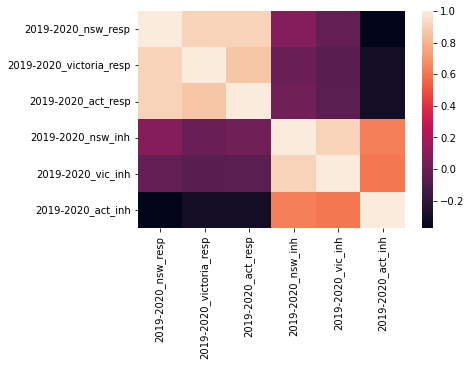

In [110]:
sns.reset_orig()
sns.heatmap(correlation20192020)
plt.show()

Looking at the table and the heat map, there is close to zero correlation  rather in some cases negative between respiratory test MBS claims and PBS/RPBS adrenergics and inhalants prescriptions dispensed for the year 2019-2020.

A strong correlation is observed between the states for respiratory test MBS items claims for the year 2019-2020.

Similarly a strong correlation is observed esp between NSW and Victoria for the PBS/RPBS adrenergics and inhalant prescriptions dispensed for the year 2019-2020.

# References:

Wkipedia, 2021 https://en.wikipedia.org/wiki/Bushfires_in_Australia#:~:text=Bushfires%20in%20Australia%20are%20a%20widespread%20and%20regular,evolved%20to%20thrive%20on%20the%20phenomenon%20of%20bushfire.
Australian Institute of Health and Welfare. (2020). Australian bushfires 2019–20: exploring the short-term health impacts. Canberra: AIHW.
Nguyen, Kevin; Brunero, Tim; Thomas, Sarah; Keane, Daniel; Mills, Nicole (18 January 2020). "The truth about Australia's fires — arsonists aren't responsible for many this season". ABC News. Australia. Retrieved 15 February 2020
Tolhurst, Kevin. "It's 12 months since the last bushfire season began, but don't expect the same this year". The Conversation. Retrieved 12 August 2020. 